# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

Thera bank recently saw a steep decline in the number of users of their credit card accounts. Credit cards are a good source of income for banks because of the different kinds of fees charged by banks including annual fees, balance transfer fees, cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers attriting (i.e. closing their credit card accounts) would lead bank to lose sources of income. Thera Bank wants to analyze the data of customers and identify the customers who are more likely to close their credit card account and their reasons for doing so. Thera Bank can then change their customer-retention strategies to ensure greater customer retention over time.

As a data scientist at Thera Bank, you need to create a classification model that will help the bank improve its services so that customers do not close their credit card accounts.

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If customers don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. This is called a revolving balance.

##### What is the Average Open to buy?

- 'Open to Buy' means the amount of credit available on your line of credit. This column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.

##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [1]:
# Upgrade pip

!pip install --upgrade pip -q

In [2]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.12.0 xgboost==2.0.3 -q --user
!pip install --upgrade -q threadpoolctl

In [3]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# To suppress scientific notations

pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data

from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values

from sklearn.impute import SimpleImputer

# To oversample and undersample data

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe

pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe

pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [320]:
# Use the .read_csv function to load the dataset

churn = pd.read_csv("BankChurners.csv")

## Data Overview

In [321]:
# Use the .shape function to display the number of rows and columns present in the dataset

churn.shape 

(10127, 21)

#### Observations:

There are **10,127 rows and 21 columns** present in the dataset.

In [322]:
# Create a copy of the dataset as a DataFrame to preserve quality of the original dataset

data = churn.copy()

In [323]:
# Use the .head function to view the first 5 rows of the DataFrame

data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


#### Observations:

The presence of "NaN" in the "Marital_Status" column is noteworthy and will be explored further when checking for missing values.

In [324]:
# Use the .tail function to view the final 5 rows of the DataFrame

data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


#### Observations:

The presence of "NaN" in both "Education_Level" and "Marital_Status" warrants further investigation.

In [325]:
# Use the .info function to generate an overview of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Observations:

There are **10 integer columns (int64)**, **6 object columns**, and **5 floating point columns (float64)** present in the DataFrame.

Both the "Education_Level" and "Marital_Status" columns feature a significant number of missing values.

In [326]:
# Use the .isnull function to detect missing values in DataFrame and use the sum function to total the missing values

missing_values = data.isnull().sum()
missing_values

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

#### Observations:

Using the .isnull and .sum functions indicates the presence of **1,519 null values of "N/A" in the "Education_Level" column** and **749 null values of "NaN" in the "Marital_Status" column.**

In [327]:
# Use the .describe function to generate a description of the data in our DataFrame

data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


#### Observations:

The "CLIENTNUM" column is not needed for future EDA and will be dropped.

**Most of the customers are in their 40's** with the **youngest customer 26 years old** and the **oldest customer 73 years old.**

The majority of customers have **at least 1 dependent.**

In [328]:
# Use the .drop function to drop the "CLIENTNUM" column because it does not have analytical relevance

data = data.drop(columns=['CLIENTNUM'])

### Outlier Detection

In [329]:
Q1 = data.quantile(0.25)  # Find the 25th percentile
Q3 = data.quantile(0.75)  # Find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Determine lower and upper bounds for all values. All values outside these lower and upper bounds are considered outliers

lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [330]:
# checking the % outliers

((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

#### Observations:

In this case, outliers in Thera Bank's dataset appear realistic and should not negatively impact subsequent EDA and model building so they will not be treated and EDA can begin.

## Exploratory Data Analysis (EDA)

### EDA Functions

In [217]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="skyblue"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="crest"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [218]:
# Reusable function for labeled barplots

def labeled_barplot(data, feature, perc=False, n=None, palette="crest"):
    """
    Customized barplot with percentage at the top and customizable color palette.

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    palette: color palette (default is "coolwarm")
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette=palette,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
            color="blue"  # Changing the annotation text color
        )

    plt.xlabel("Category")  # Custom X-axis label
    plt.ylabel("Count")  # Custom Y-axis label
    plt.title("Bar Plot of " + feature)  # Custom plot title
    plt.show()

In [219]:
# Function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [220]:
# Function to plot distributions with regard to target variable

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

### **Attrited vs Retained Thera Bank Customers**

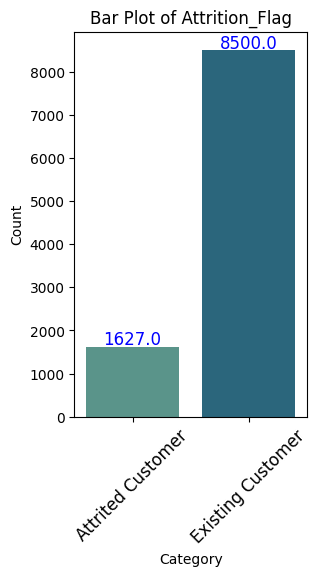

In [221]:
labeled_barplot(data, "Attrition_Flag")

#### Observations:

Thera Bank **lost 1,627 customers** and **retained 8,500 customers** from the 10,127 customers in the dataset. This means that **Thera Bank lost roughly 16% of their customers** with accounts at the bank.

### **Gender of Thera Bank Customers**

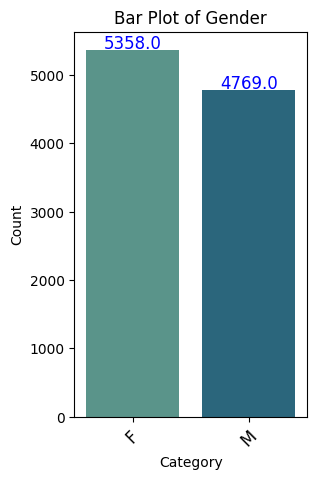

In [222]:
labeled_barplot(data, "Gender")

#### Observations:

Thera Bank has **5,358 female customers** and **4,769 male customers** in this dataset, **a roughly 53% to 47% split respectively.**

### **Number of Dependents of Thera Bank Customers**

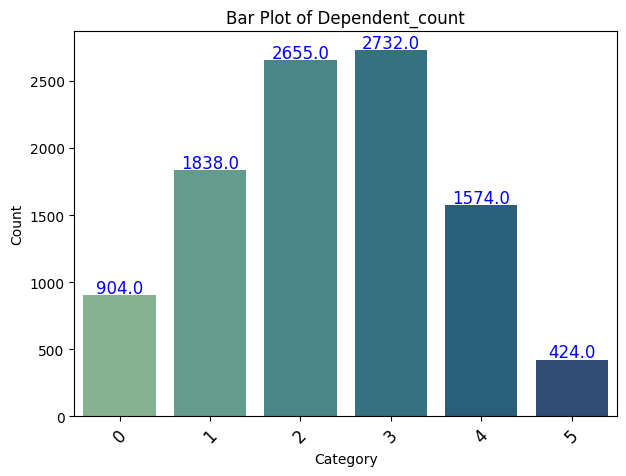

In [223]:
labeled_barplot(data, "Dependent_count")

#### Observations:

**Over 90% of Thera Bank customers have at least 1 dependent.** **904 customers have 0 dependents** comprising less than 10% of Thera Bank's total customers. **Roughly 53% of Thera Bank customers have 2-3 dependents.** This means that the vast majority of Thera Bank customers have family members whom they support financially.

### **Education Level of Thera Bank Customers**

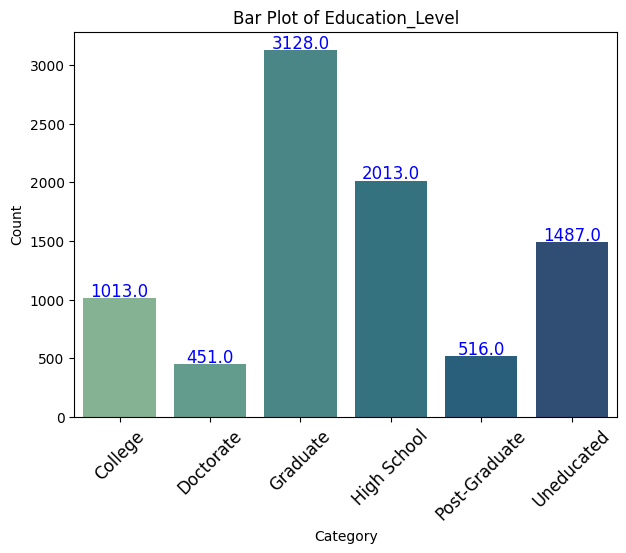

In [224]:
labeled_barplot(data, "Education_Level")

#### Observations:

3,128 or roughly 31% of Thera Bank customers have graduated college. 516 customers have a master's degree and 451 have a doctorate degree. This means less than 10% of Thera Bank customers have advanced degrees. **Roughly 50% of Thera Bank customers either have, or are pursuing, a college education.** In total, 2,013 or roughly 20% of Thera Bank customers have graduated from high school but have not attended college. 1,487 or roughly 15% of Thera Bank customers have no secondary education whatsoever. **1,519 or roughly 15% of Thera Bank customers are missing data about their education level.** These missing values will be imputed later. 

### **Marital Status of Thera Bank Customers**

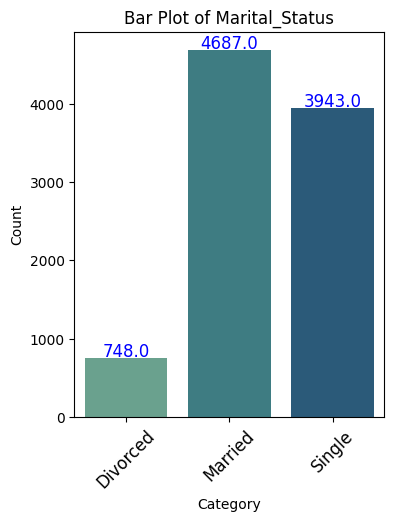

In [225]:
labeled_barplot(data, "Marital_Status")

#### Observations:

4,687 or roughly 46% of Thera Bank customers are currently married. 748 or less than 10% of Thera Bank customers are divorced. 3,943 or roughly 39% of Thera Bank customers are currently single. **749 or roughly 7% of Thera Bank customers are missing data about their marital status.** These values will be imputed later. 

### **Annual Income Category of Thera Bank Customers**

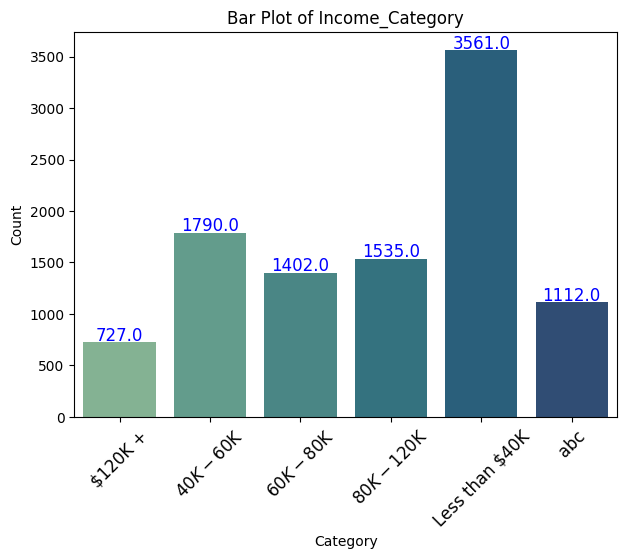

In [226]:
labeled_barplot(data, "Income_Category")

#### Observations:

3,561 or roughly 35% of Thera Bank customers make less than 40,000 dollars each year. Roughly 53% of Thera Bank customers make less than 60,000 dollars each year. A much smaller 7% portion of Thera Bank customers make more than 120,000 dollars each year and, unsurprisingly, make up the income category outliers. **1,112 or roughly 11% of Thera Bank customers are missing data about their income category.** These values will be imputed later.

### **Type of Card of Thera Bank Customers**

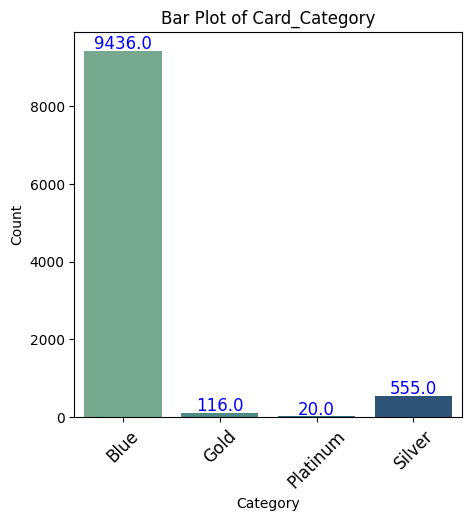

In [227]:
labeled_barplot(data, "Card_Category")

#### Observations:

**9,436 or roughly 94% of Thera Bank customers have Blue-level cards.** Blue-level cards represent the vast majority of Thera Bank card holders. Just 20 Thera Bank customers have Platinum-level cards but the income categories for these customers do not indicate any appreciable relationships between card levels and income categories.

### **Total Number of Products Held by Thera Bank Customers**

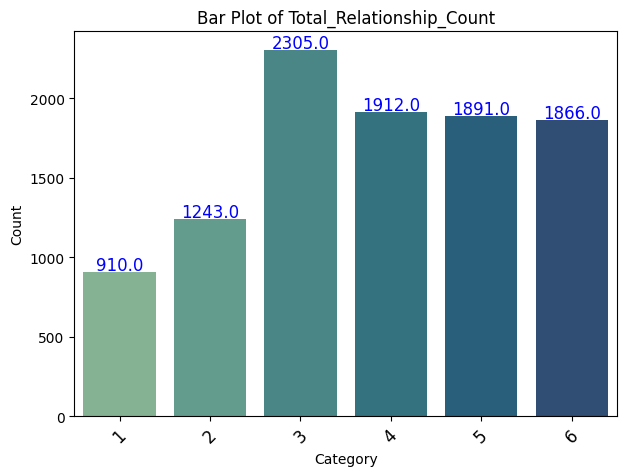

In [228]:
labeled_barplot(data, "Total_Relationship_Count")

#### Observations:

2,305 or roughly 23% of Thera Bank customers have 3 products. **Roughly 79% of Thera Bank customers have at least 3 products.**

### **Number of Months Inactive in the Last 12 Months by Thera Bank Customers**

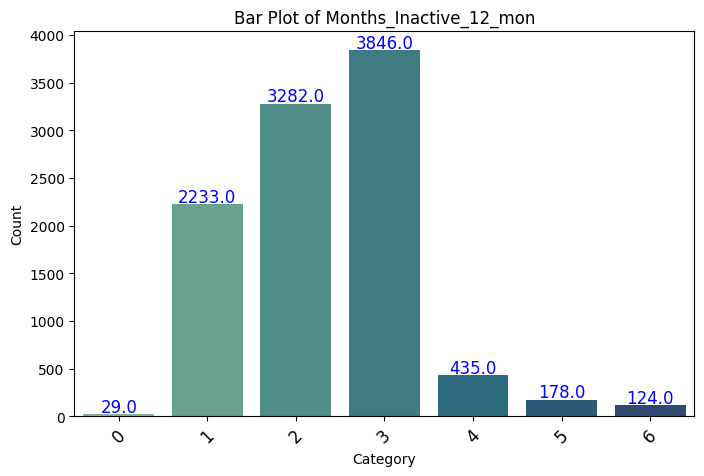

In [229]:
labeled_barplot(data, "Months_Inactive_12_mon")

#### Observations:

More than 90% of Thera Bank customers will not go more than 3 months without interacting with Thera Bank. The roughly 7% of customers who go 4, 5, or 6 months without interacting with Thera Bank are noteworthy. 

### **Number of Contacts in the Last 12 Months by Thera Bank Customers**

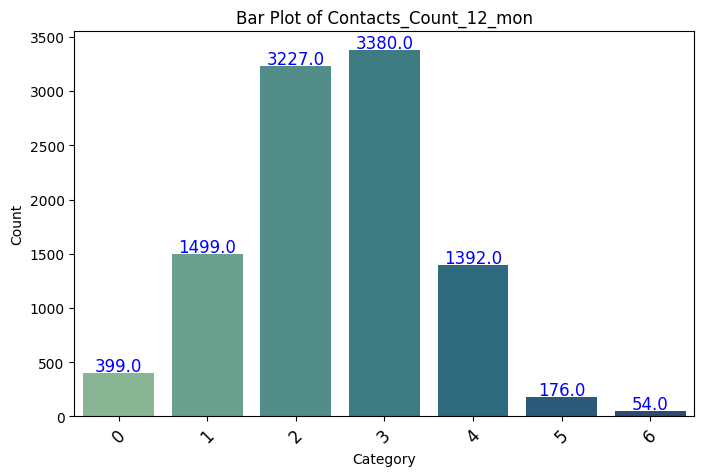

In [230]:
labeled_barplot(data, "Contacts_Count_12_mon")

#### Observations:

Roughly 84% of Thera Bank customers have 3 or less contacts with Thera Bank over the last 12 months. The 16% of Thera Bank customers with 4, 5, or 6 contacts with Thera Bank are noteworthy.

### **Thera Bank Customer Age (In Years)**

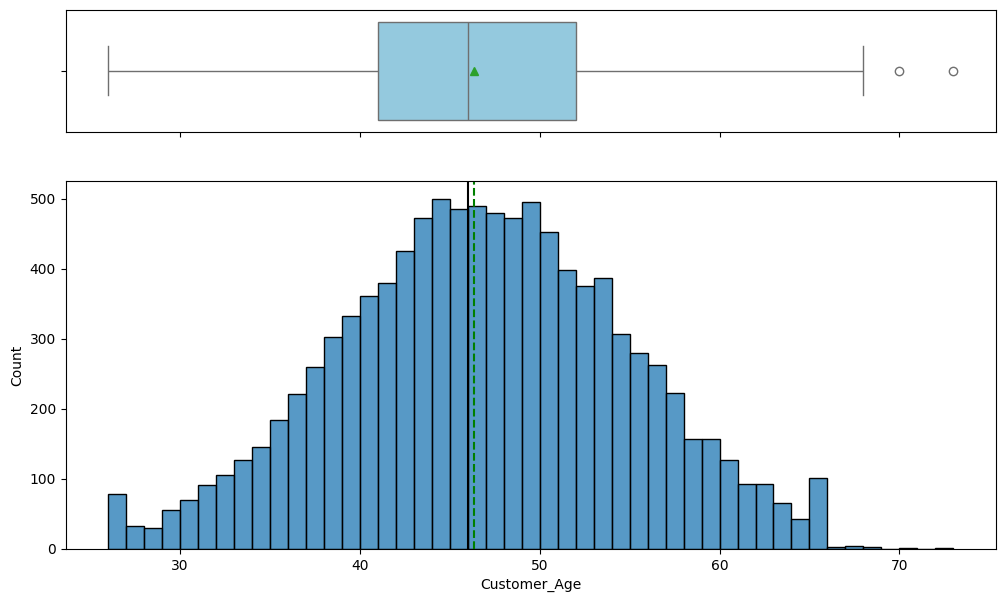

In [231]:
histogram_boxplot(data, "Customer_Age")

#### Observations:

The mean age of Thera Bank customers is 46 years old with a relatively even distribution aroung that point. The oldest customer in this dataset is 73 years old and the youngest customer is 26 years old. It seems likely that most Thera Bank customers are established in their careers / professions. 

### **Thera Bank Customer Period of Relationship with Bank (In Months)**

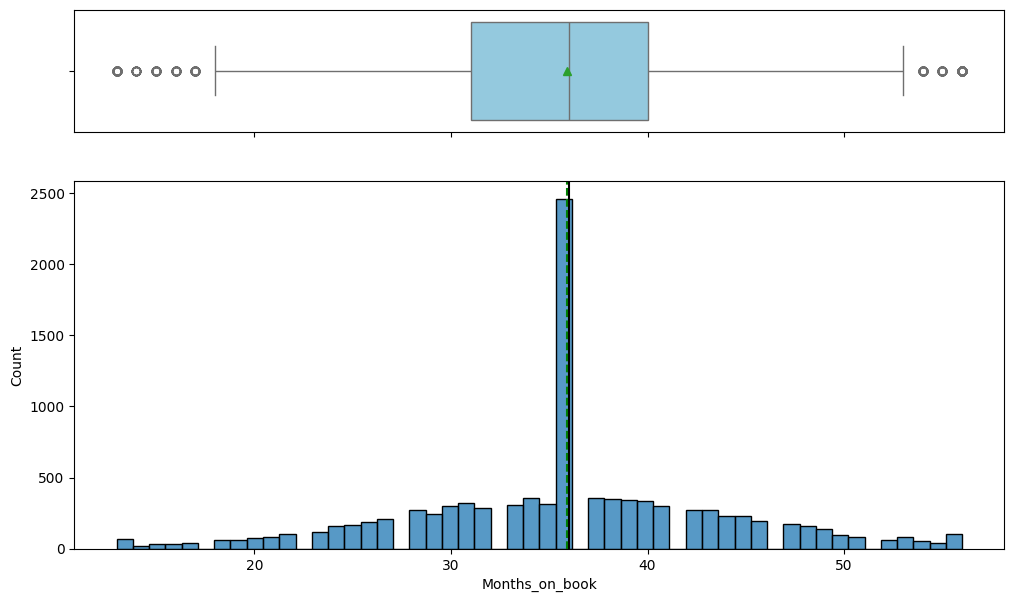

In [232]:
histogram_boxplot(data, "Months_on_book")

#### Observations:

**The mean period of time Thera Bank customers have been patrons at Thera Bank is roughly 36 months (or 3 years).** Customers with 3 years of patronage at Thera Bank make up the vast majority of the bank's customers. The distribution of other values is relatively even with a minimum value of 13 months and a maximum value of 56 months.

### **Thera Bank Customer Credit Limit**

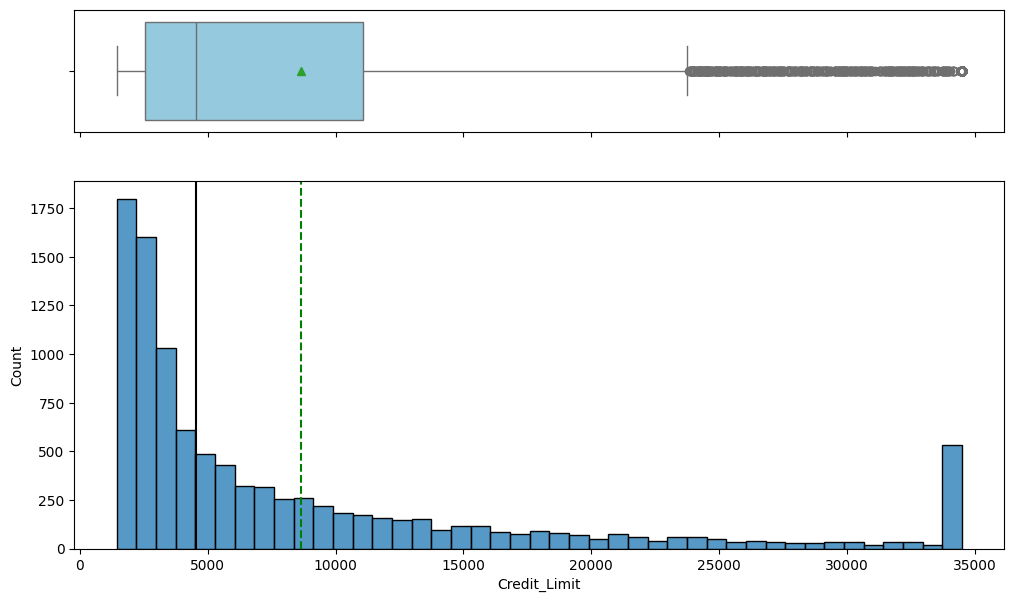

In [233]:
histogram_boxplot(data, "Credit_Limit")

#### Observations:

**The mean credit limit for Thera Bank customers is roughly 8,632 dollars and the distribution of values is heavily right-skewed.** This skewness indicates a significant majority of Thera Bank customers have credit limits less than or equal to 5,000 dollars. There is a surprisingly-high number of customers with roughly 34,500 dollar credit limits, noteworthy outliers.

### **Total Revolving Balance for Thera Bank Customers**

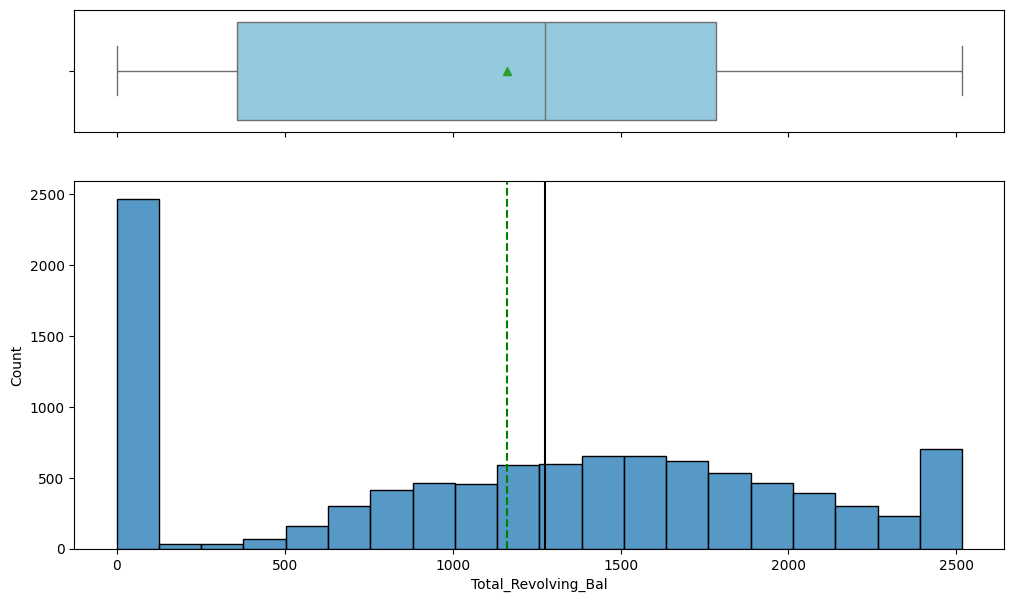

In [234]:
histogram_boxplot(data, "Total_Revolving_Bal")

#### Observations:

**The mean total revolving balance for Thera Bank customers is 1,163 dollars per month.** Just under 2,500 customers maintain revolving balances of 0, skewing the data slightly to the right. Thera Bank could focus on providing unique deals to customers with revolving balances of 0 in hopes of increasing the monthly fees Thera Bank collects from its customers.

### **Non-Utilized Credit Line (Average of Last 12 Months) of Thera Bank Customers**

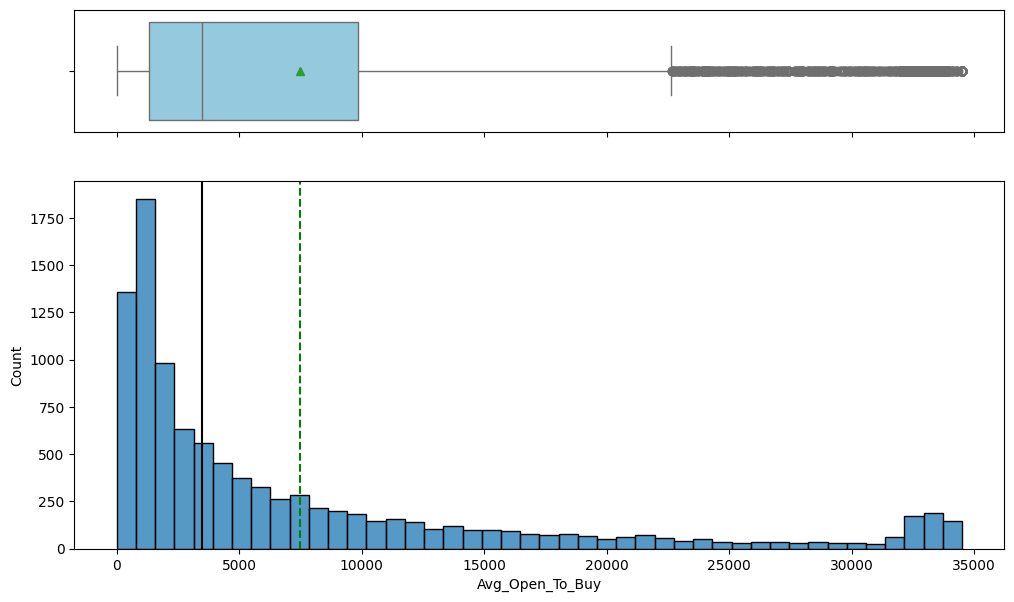

In [235]:
histogram_boxplot(data, "Avg_Open_To_Buy")

#### Observations:

The mean monthly value of unused credit by Thera Bank customers is 7,469 dollars but the histogram / boxplot reveals significant right skewness and a high number of customers who utilize close to their entire line of credit each month. These customers are already actively invested in monthly transactions with Thera Bank meaning the bank should focus on customers to the right of the mean value who have very high lines of credit that go unused.

### **Change in Transaction Amount (Q4 over Q1)**

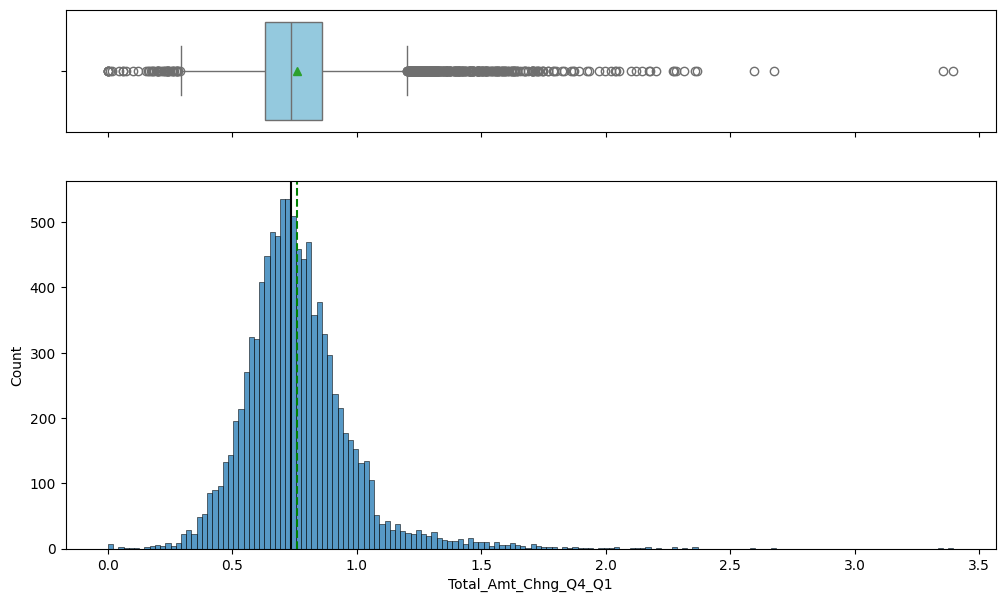

In [236]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

#### Observations:

This distribution is skewed to the right, indicating that for most customers, the change in the total amount spent from Q4 to Q1 is relatively low, with a smaller number of customers showing a high change. This could suggest seasonal spending behaviors or specific events that lead to increased spending for some customers.

### **Total Transaction Amount (Last 12 Months)**

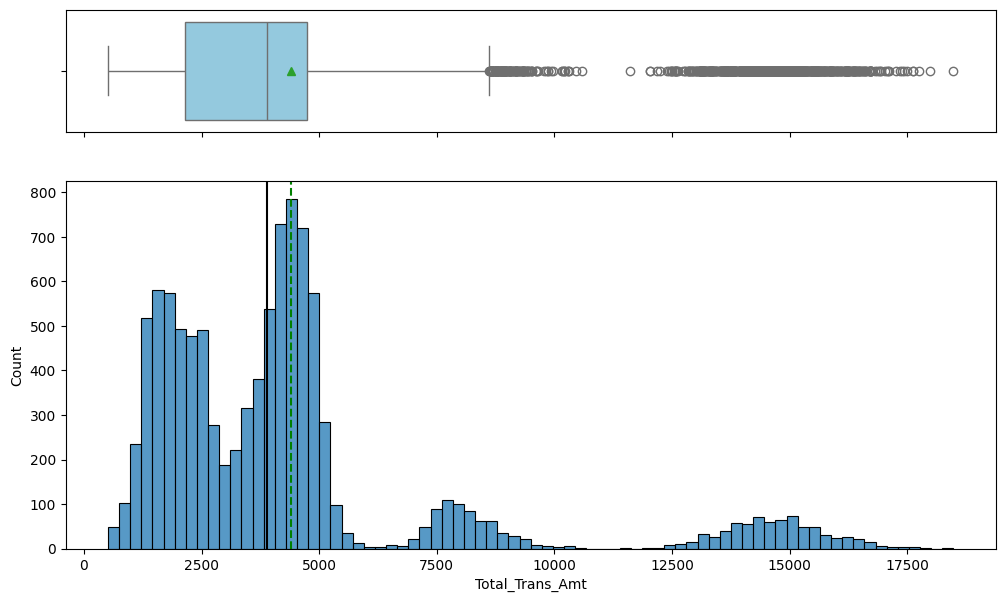

In [237]:
histogram_boxplot(data, "Total_Trans_Amt")

#### Observations:

The total transaction amount also shows a right-skewed distribution, indicating that a large number of customers have lower transaction amounts, while a smaller number have significantly higher amounts. This could reflect a wide range of spending habits among the bank's customers.

### **Total Transaction Count (Last 12 Months)**

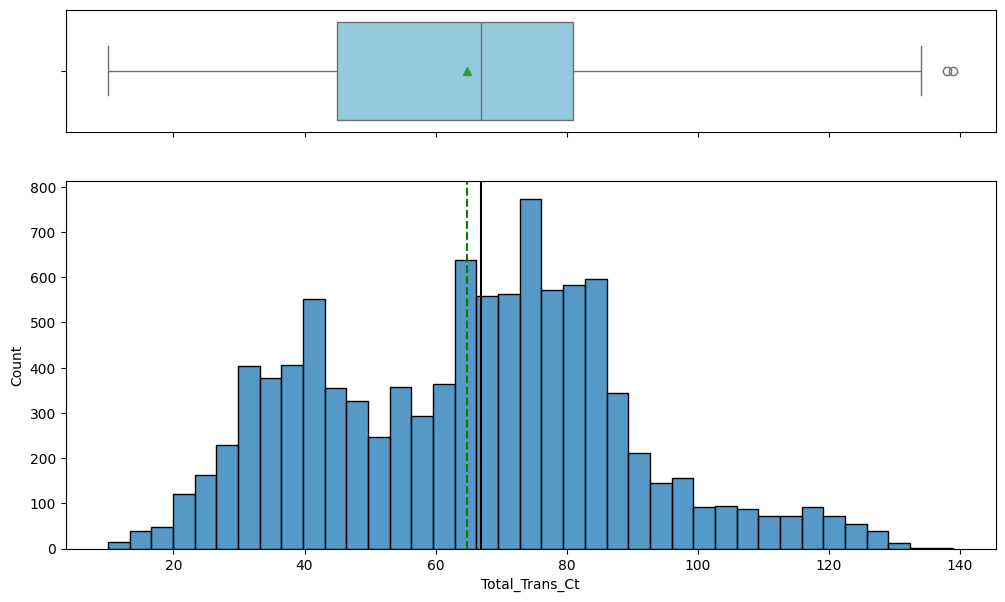

In [238]:
histogram_boxplot(data, "Total_Trans_Ct")

#### Observations:

This distribution is more balanced but still slightly skewed to the right. Most customers fall within a moderate range of transaction counts, indicating a consistent usage pattern, but there's also a noticeable amount of customers with very high transaction counts, possibly indicating heavy card users.

### **Change in Transaction Count (Q4 over Q1)**

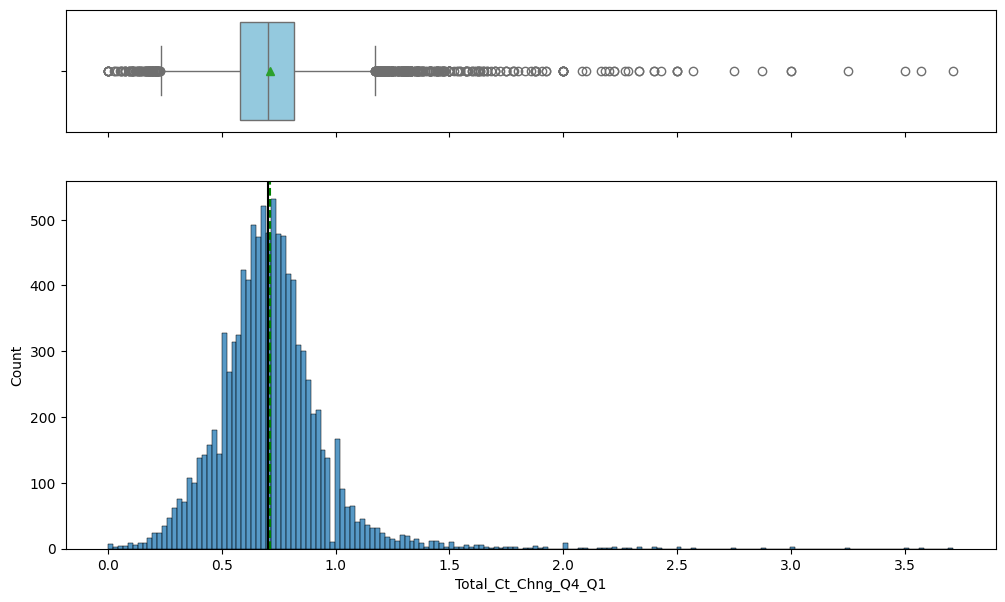

In [239]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

#### Observations:

This feature is right-skewed, similar to the total amount change, suggesting that the number of transactions from Q4 to Q1 increases only for a smaller group of customers. This could be influenced by the same factors affecting the amount change, like seasonal spending or specific promotions.

### **Average Card Utilization Ratio**

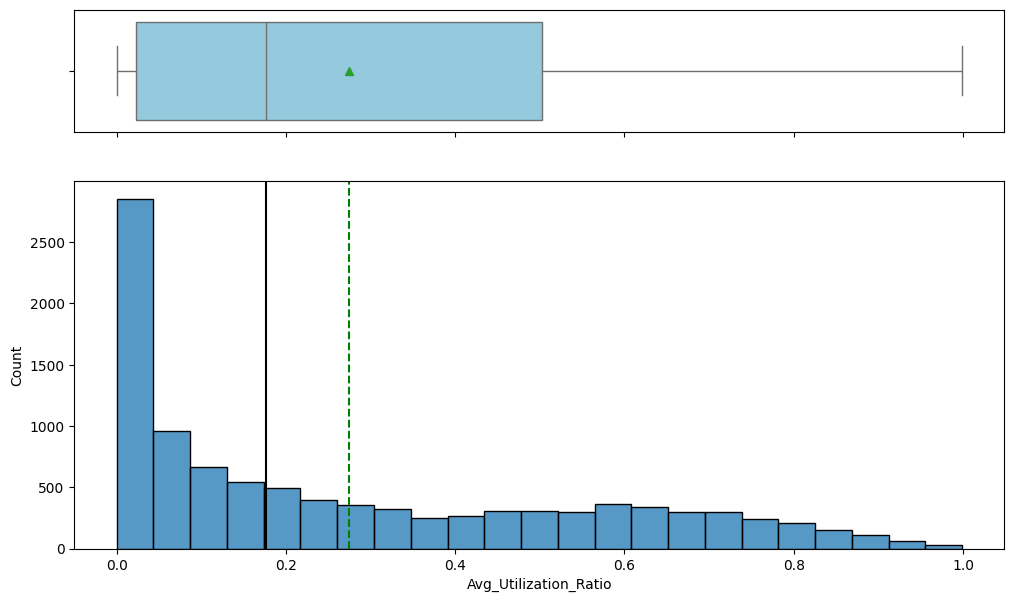

In [240]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

#### Observations:

The distribution of the average utilization ratio shows a significant number of customers with low utilization ratios, indicating that they are not using a large portion of their available credit. There's also a peak around the lower end, suggesting a substantial group of customers uses a very small fraction of their credit line.

## Bivariate Analysis

### **Attrition Flag vs Thera Bank Customer Age**

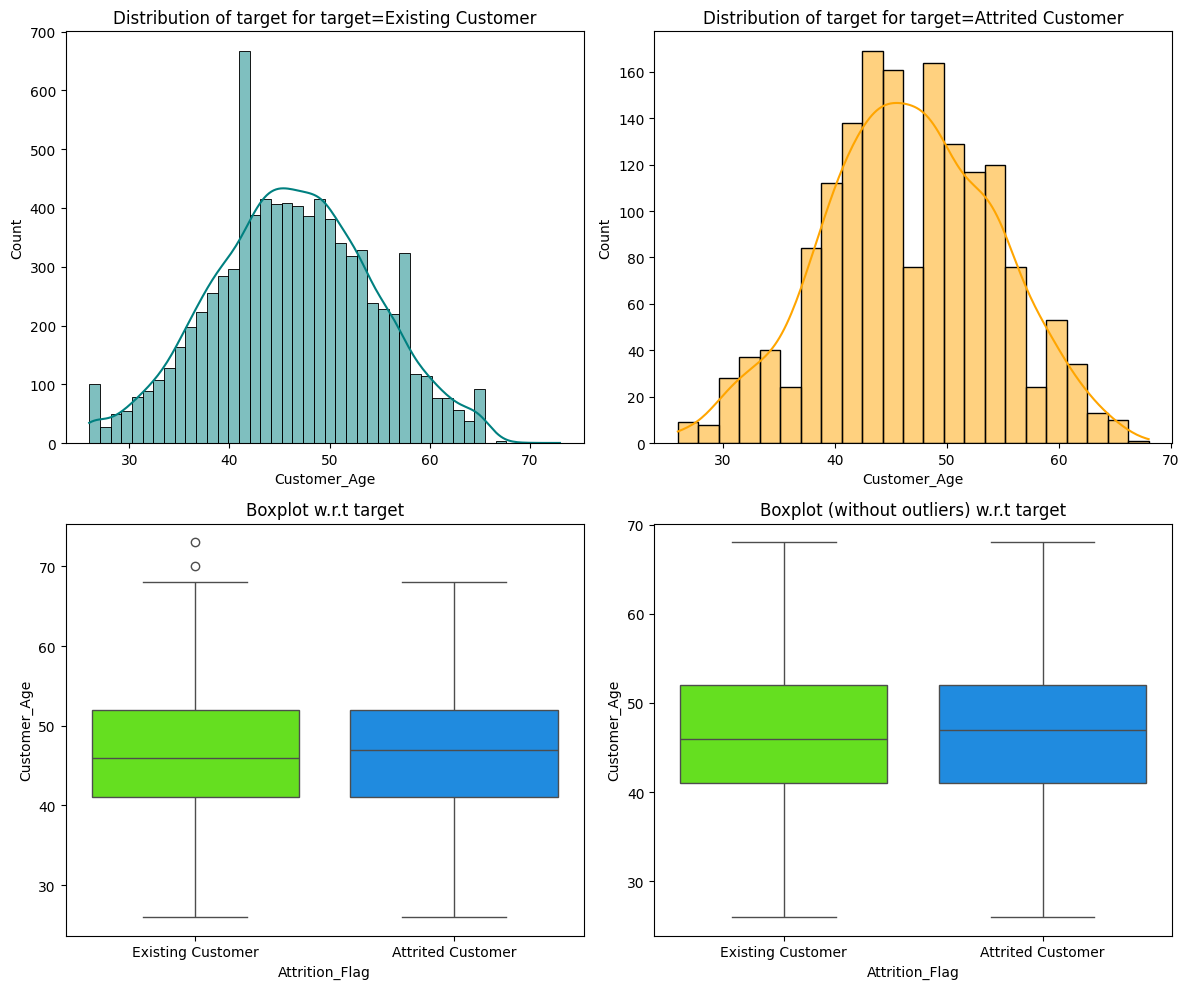

In [241]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

#### Observations:

There appears to be no significant difference in the age distribution between existing customers and those who have left. This suggests that age alone might not be a strong predictor of customer attrition.

### **Attrition Flag vs Period of Customer Relationship with Thera  Bank (In Months)**

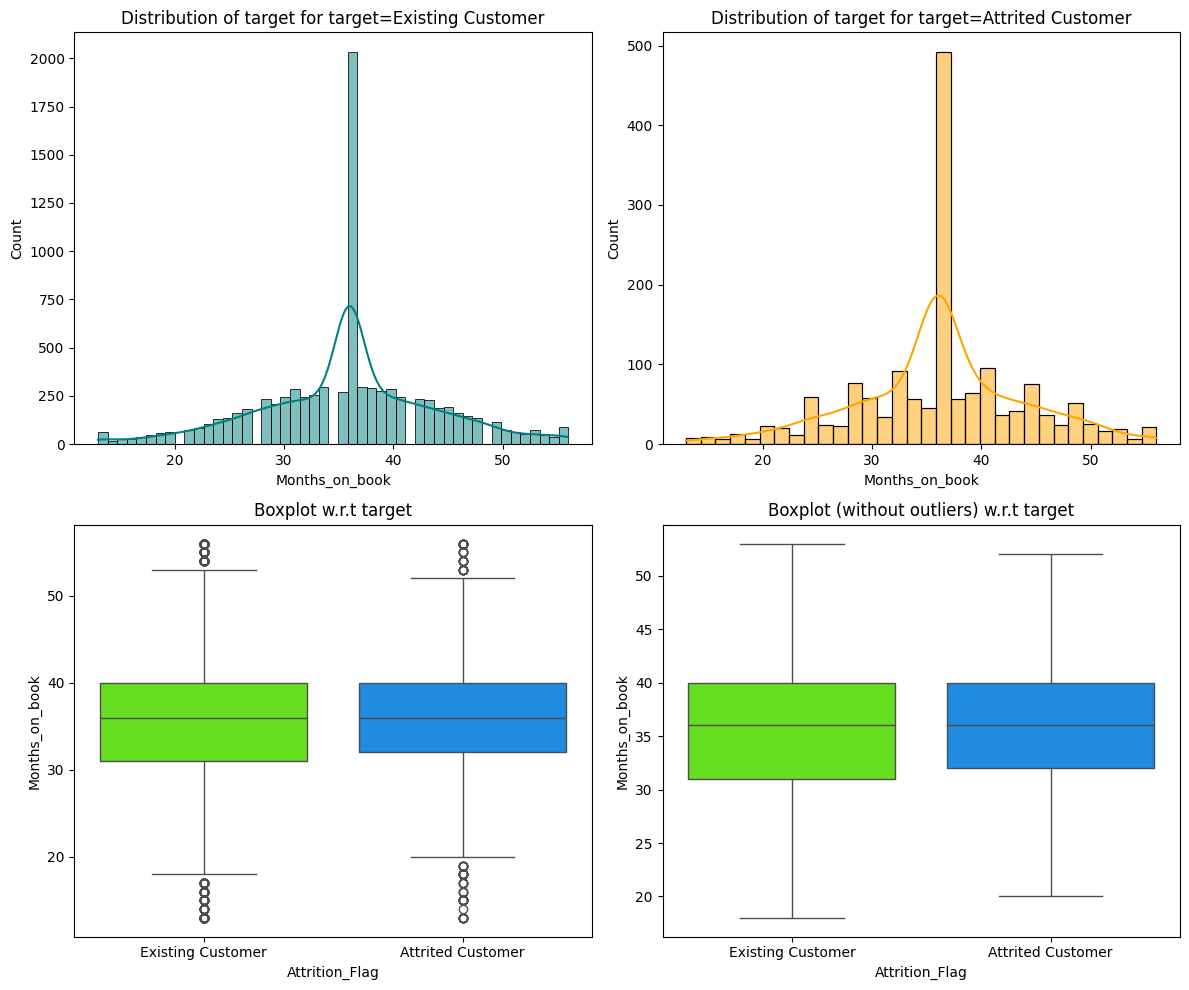

In [242]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

#### Observations:

Similar to age, the length of the relationship with the bank ("Months_on_book") does not show a significant difference between the two groups. Customers tend to stay with the bank for a similar duration regardless of whether they eventually leave or stay.

### **Attrition Flag vs Credit Limit of Thera Bank Customers**

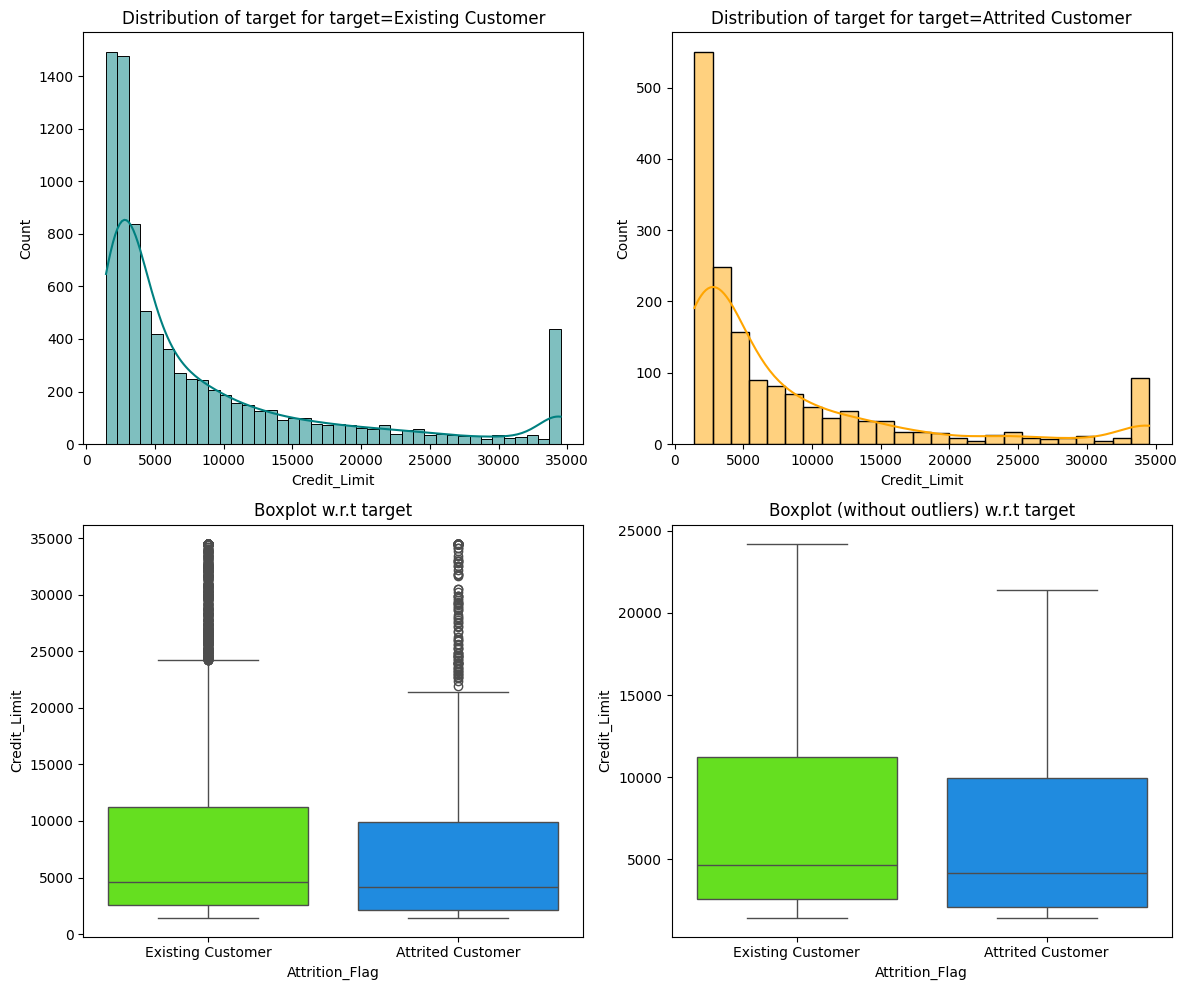

In [243]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

#### Observations:

The credit limit boxplots show some variation, with existing customers seemingly having a slightly wider range of credit limits compared to those who have left. However, the median credit limit between the two groups is not drastically different, indicating that while there might be some relationship, credit limit alone is not a clear indicator of attrition.

### **Attrition Flag vs Total Revolving Balance of Thera Bank Customers**

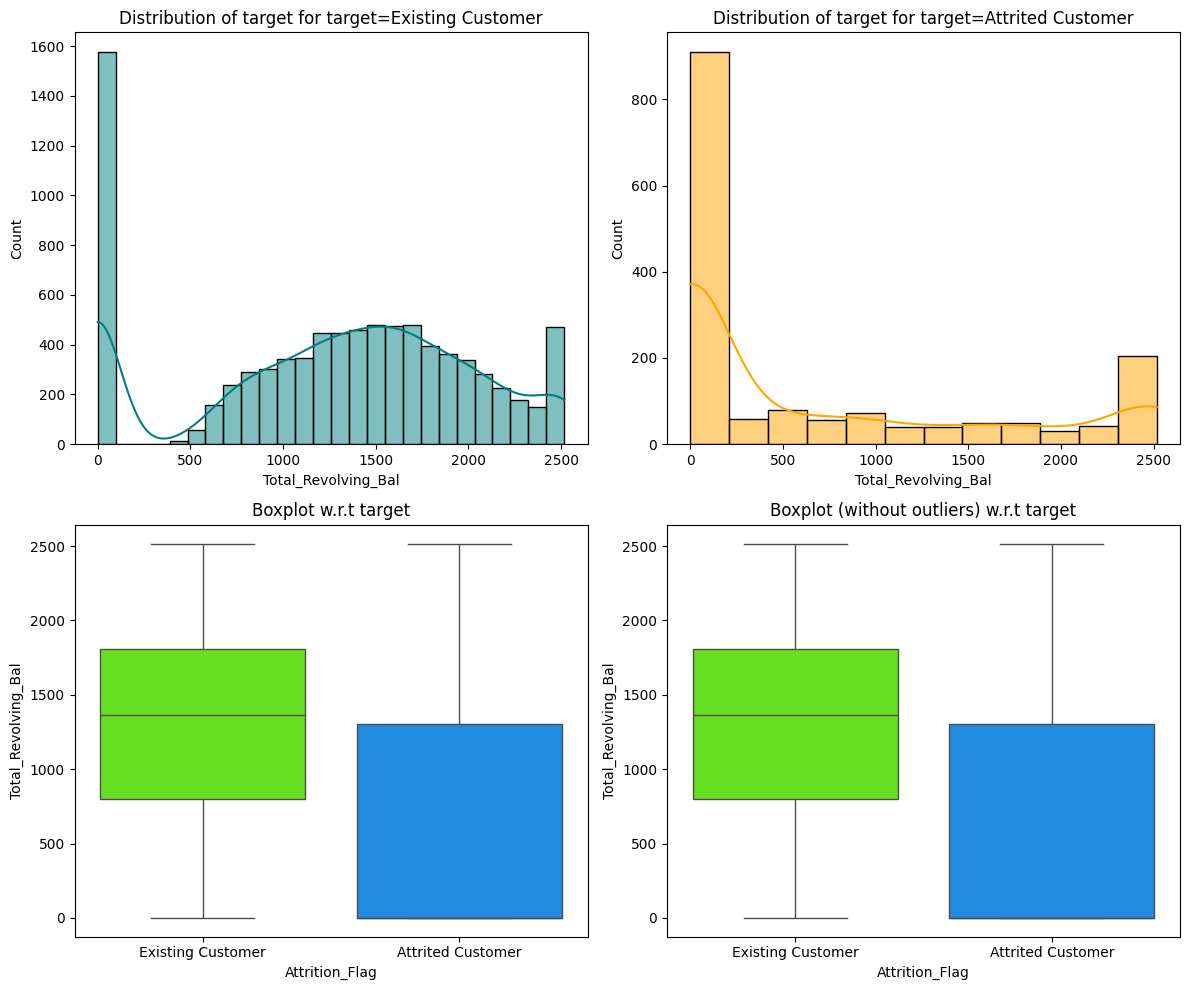

In [244]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

#### Observations:

There is a noticeable difference in the total revolving balance between existing customers and those who have left. Existing customers tend to have a higher revolving balance, suggesting they are more actively using and paying off their credit cards.

### **Attrition Flag vs Non-Utilized Credit Line (Average of Last 12 Months) of Thera Bank Customers**

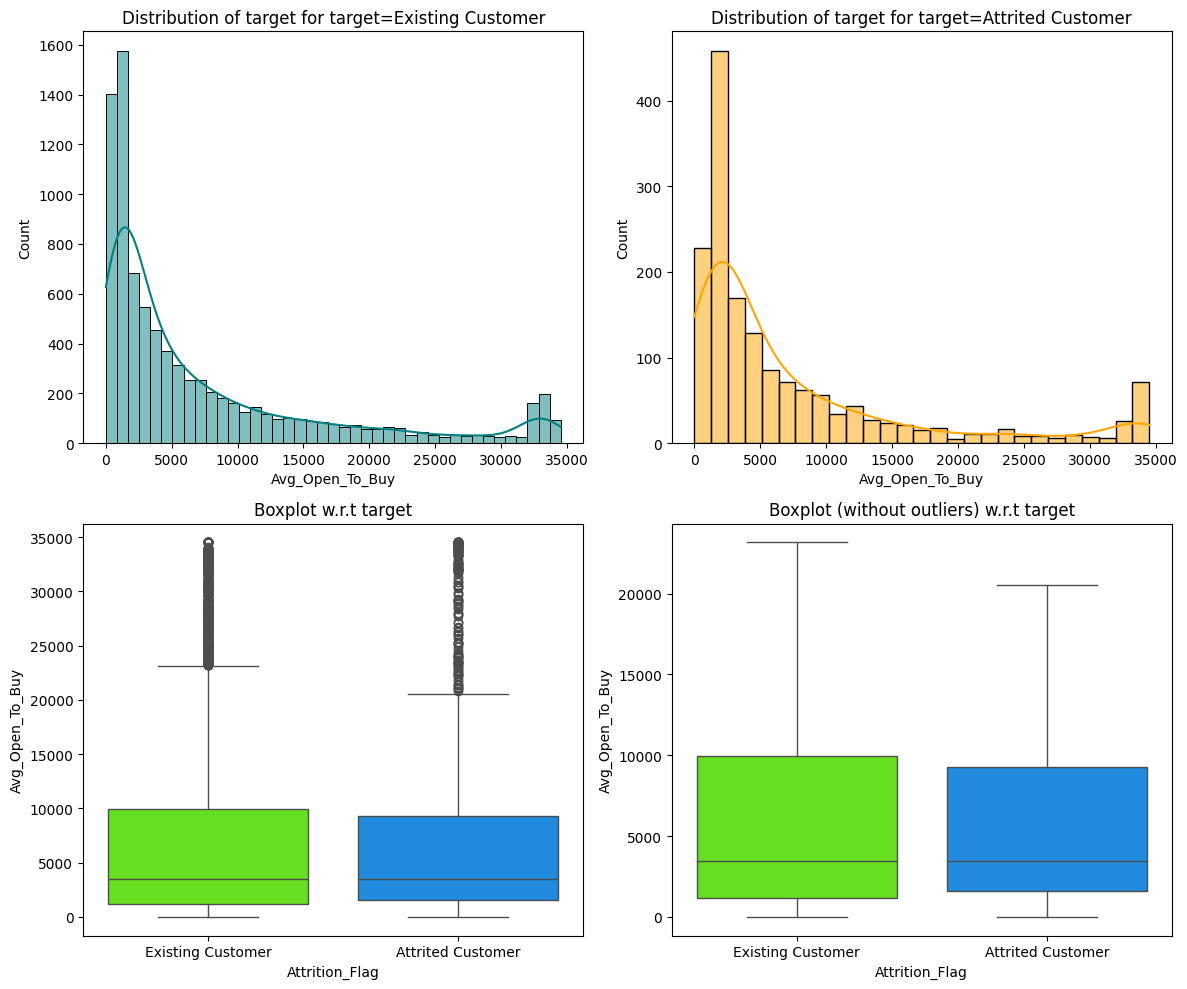

In [245]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

#### Observations:

Similar to the credit limit, the average open to buy (unused credit) shows a distribution where existing customers have a slightly higher average, but the difference is not pronounced. This might indicate that having more available credit does not significantly impact a customer's decision to leave.

### **Attrition Flag vs Change in Thera Bank Customer Transaction Amount (Q4 Over Q1)**

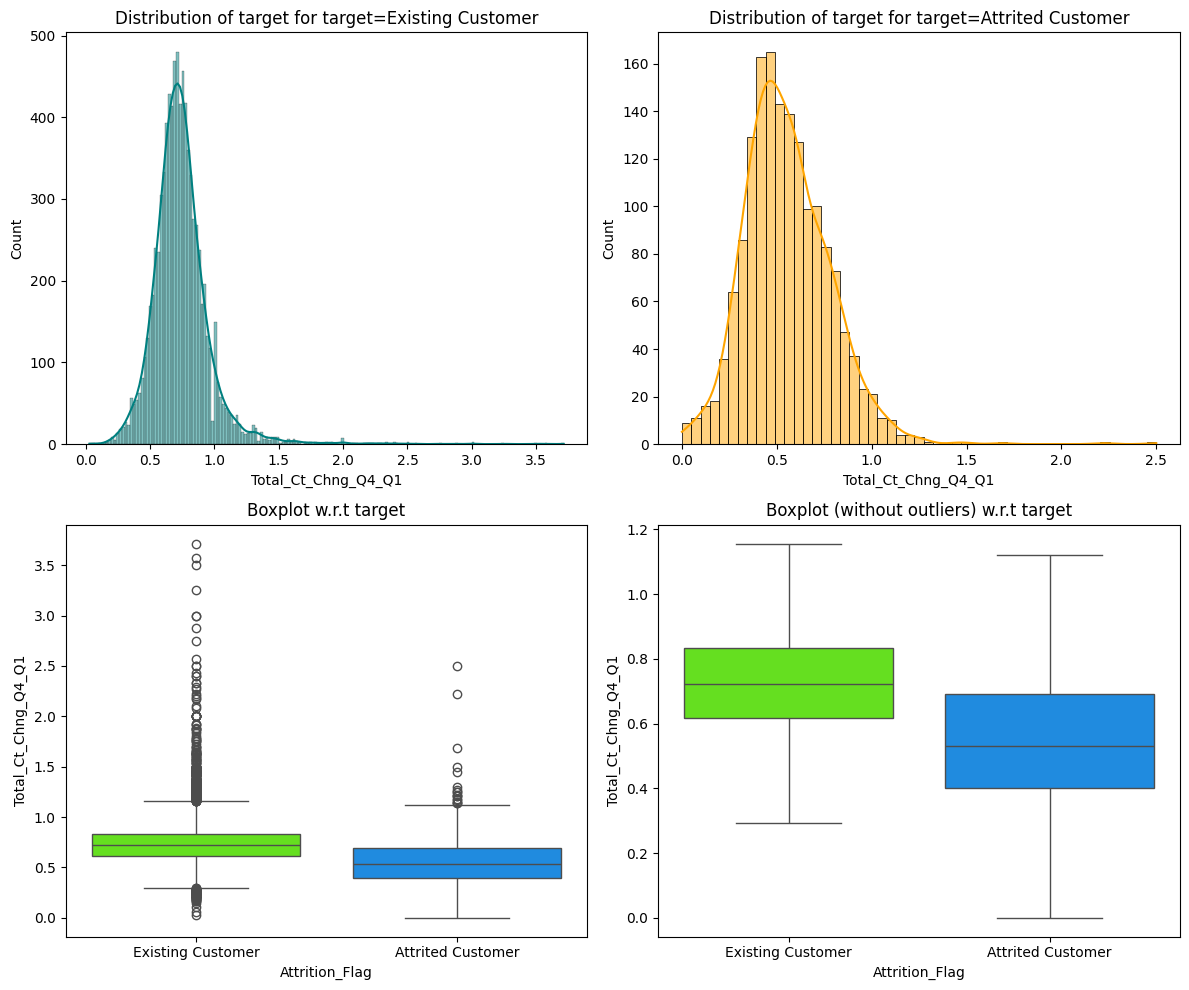

In [246]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

#### Observations:

There's a noticeable difference in transaction count change between the two groups. Customers who have left show a lower median change, which might indicate a drop in card usage before leaving.

### **Attrition Flag vs Thera Bank Customer Total Transaction Amount (Last 12 Months)**

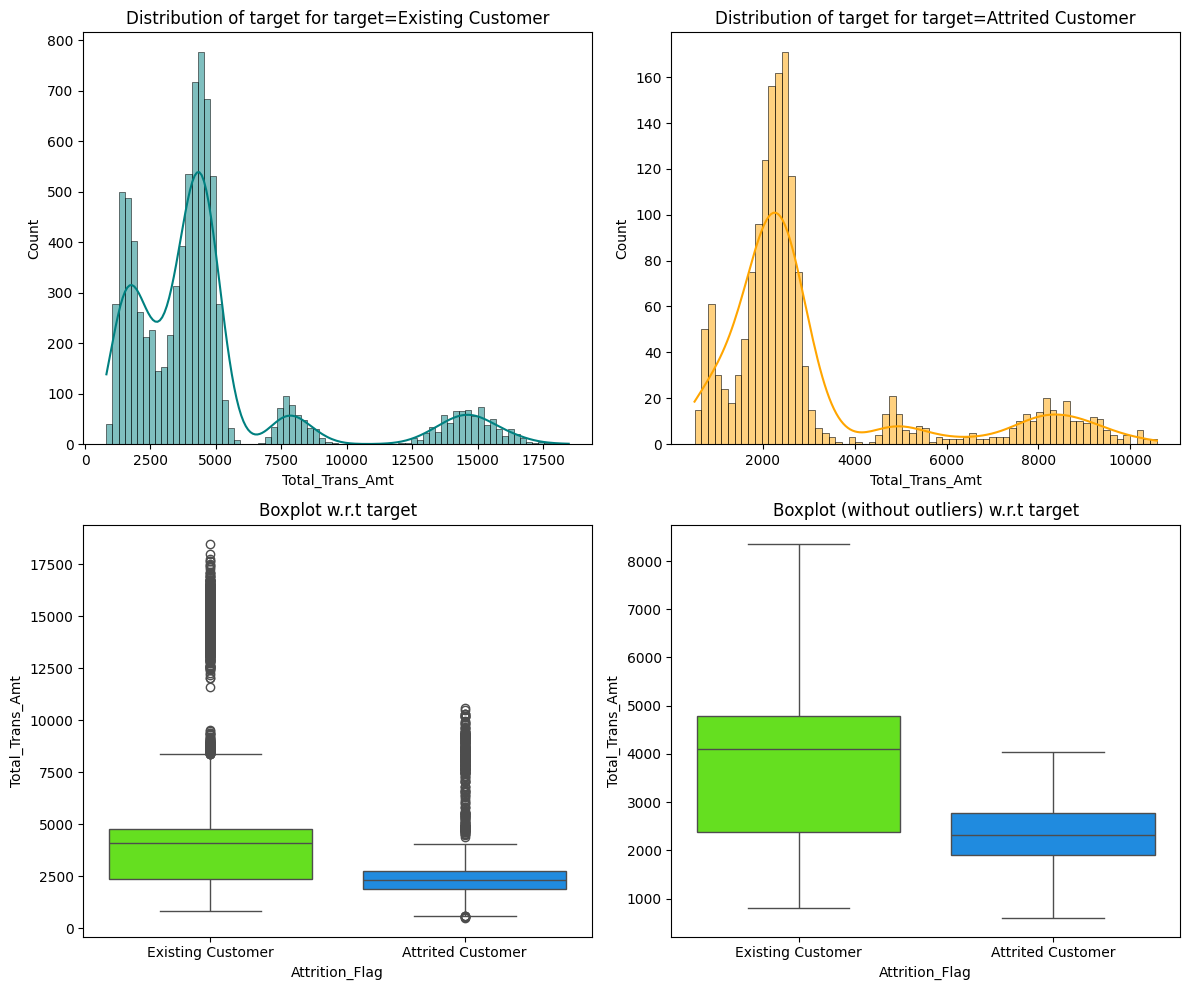

In [247]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

#### Observations:

The total transaction amount shows a significant difference, with customers who have left the bank having generally lower transaction amounts. This could suggest that lower spending on the card is a precursor to / warning-sign of  churn.

### **Attrition Flag vs Thera Bank Customer Total Transaction Count (Last 12 Months)**

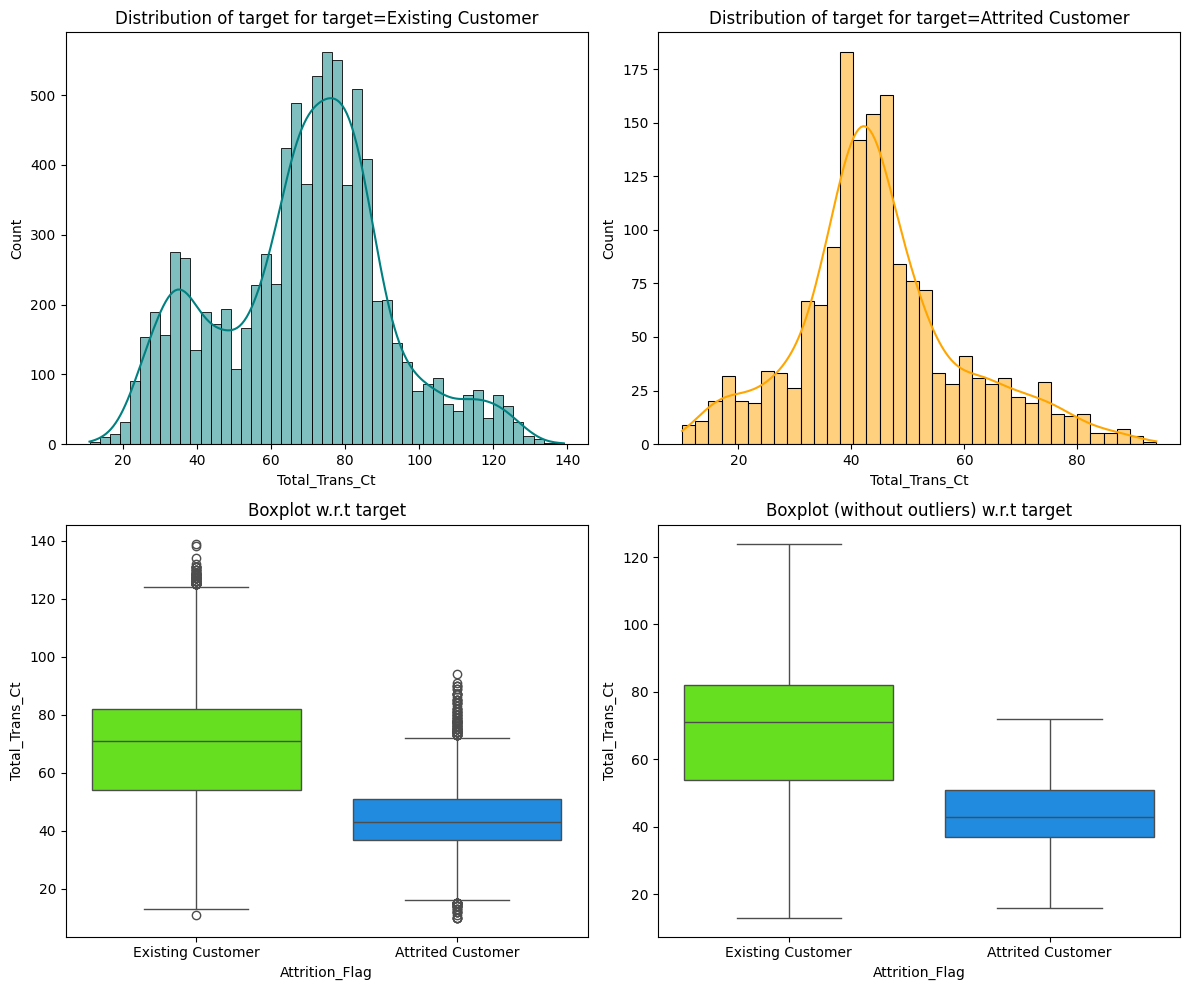

In [248]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

#### Observations:

This variable shows a clear distinction between the two groups. Customers who have left have a noticeably lower transaction count, indicating less card usage, which is a strong indicator of potential churn.

### **Attrition Flag vs Average Card Utilization Ratio of Thera Bank Customer**

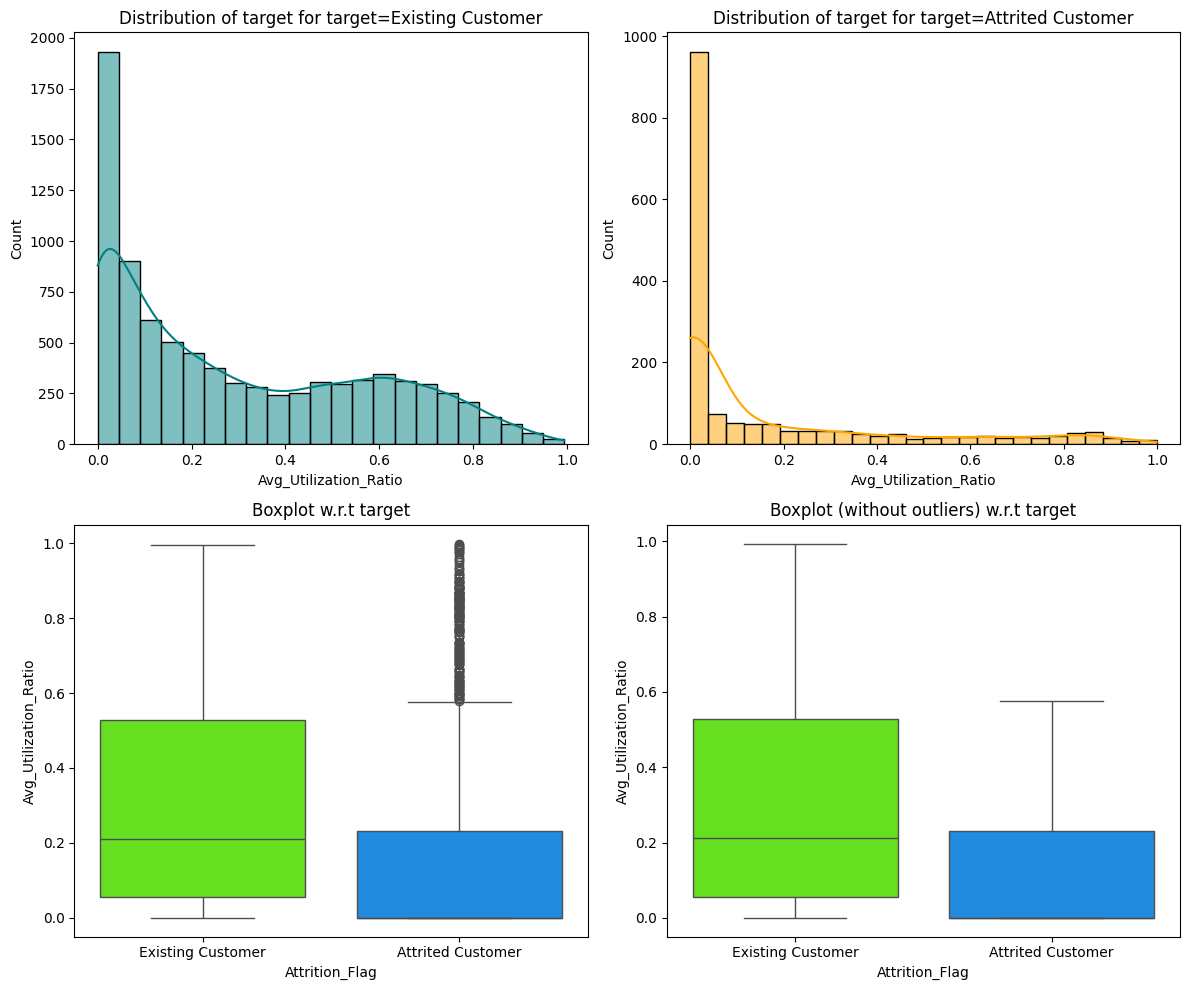

In [249]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

#### Observations:

The boxplot indicates that existing customers have a slightly higher median utilization ratio compared to those who have left. This suggests that customers who use a higher proportion of their available credit are more likely to stay with the bank.

### **Attrition Flag vs Change in Transaction Count (Q4 Over Q1) by Thera Bank Customers**

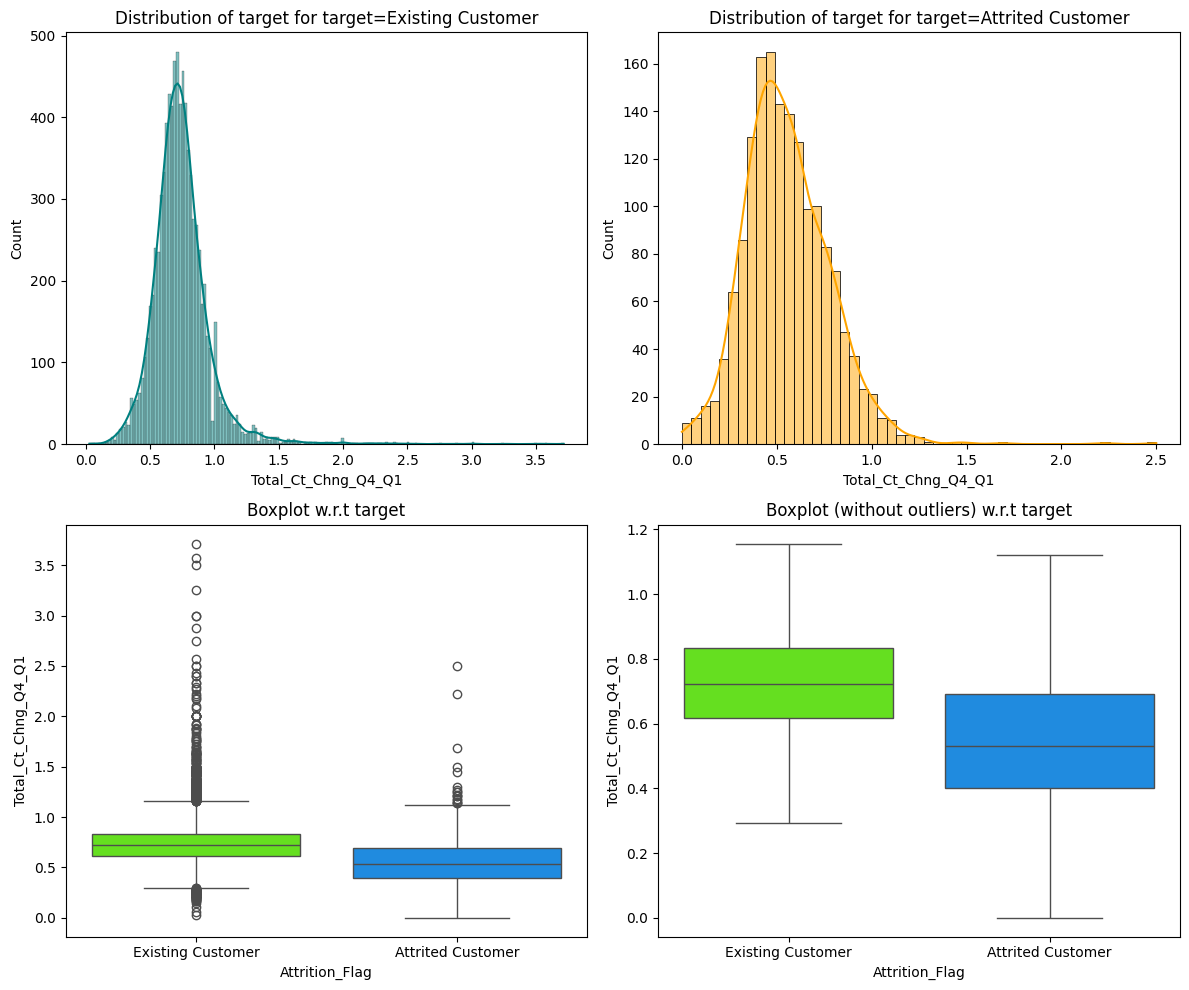

In [250]:
distribution_plot_wrt_target(data,"Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

#### Observations:

The boxplot for total transaction count change from Q4 to Q1 with attrition flag shows that customers who left the bank typically experienced a more significant drop in their transaction count compared to those who stayed. This further emphasizes that a decrease in card usage is a strong predictor of customer churn.

### **Attrition Flag vs Gender of Thera Bank Customer**

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


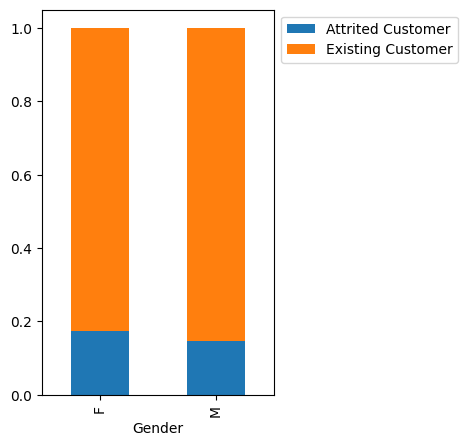

In [251]:
stacked_barplot(data, "Gender", "Attrition_Flag")

#### Observations:

The stacked barplot shows that the distribution of attrition across genders is somewhat balanced, suggesting that gender alone may not be a strong predictor of customer attrition.

### **Attrition Flag vs Number of Dependents of Thera Bank Customer**

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


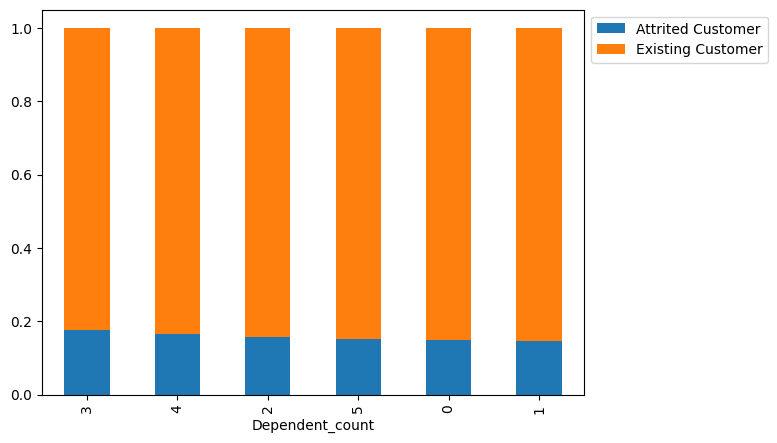

In [252]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag")

#### Observations:

The count of dependents does not show a clear trend in relation to attrition. Customers with various dependent counts seem to leave at similar rates, indicating that the number of dependents might not significantly influence attrition.

### **Attrition Flag vs Education Level of Thera Bank Customer**

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


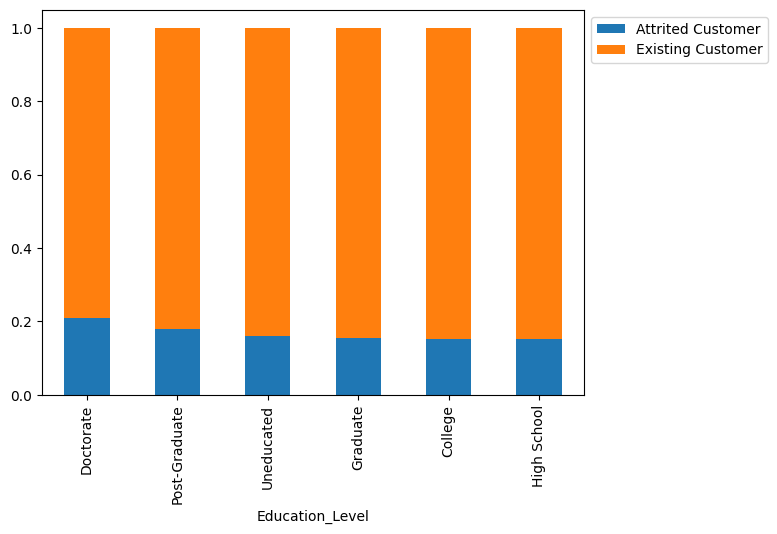

In [253]:
stacked_barplot(data,"Education_Level", "Attrition_Flag")

#### Observations:

Attrition appears to be somewhat evenly distributed across different education levels, suggesting that education level by itself may not be a strong predictor of whether a customer will leave or stay.

### **Attrition Flag vs Marital Status of Thera Bank Customer**

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


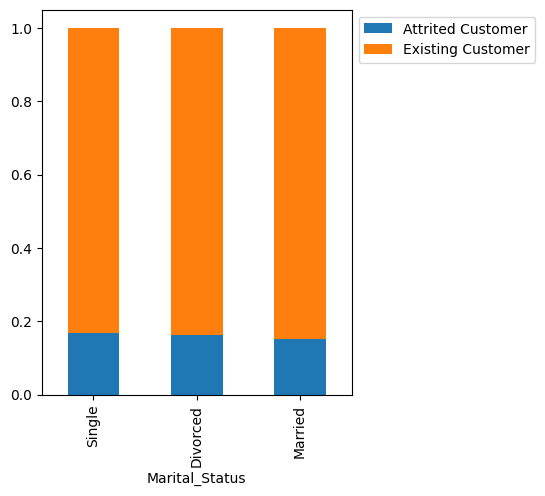

In [254]:
stacked_barplot(data,"Marital_Status", "Attrition_Flag")

#### Observations:

There doesn't seem to be a dramatic difference in attrition rates among different marital statuses.

### **Attrition Flag vs Annual Income Category of Thera Bank Customer**

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


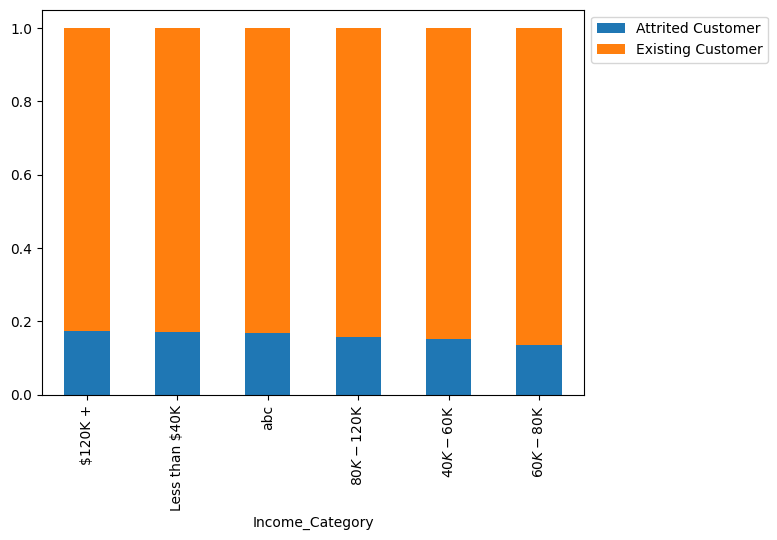

In [255]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

#### Observations:

There is some variation in attrition across different income categories, but it's not particularly stark. Lower income categories do not necessarily show higher attrition, which might suggest that income level alone is not a decisive factor in customer retention.

### **Attrition Flag vs Type of Card of Thera Bank Customer**

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


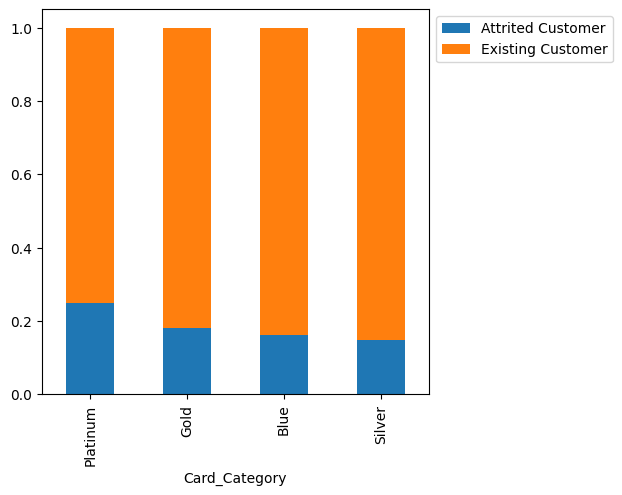

In [256]:
stacked_barplot(data,"Card_Category", "Attrition_Flag")

#### Observations:

The majority of customers, both existing and those who have left, hold the "Blue" card category. Higher-tier card categories (Gold, Platinum, Silver) show similar attrition rates.

### **Attrition Flag vs Total Number of Products Held by Thera Bank Customer**

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


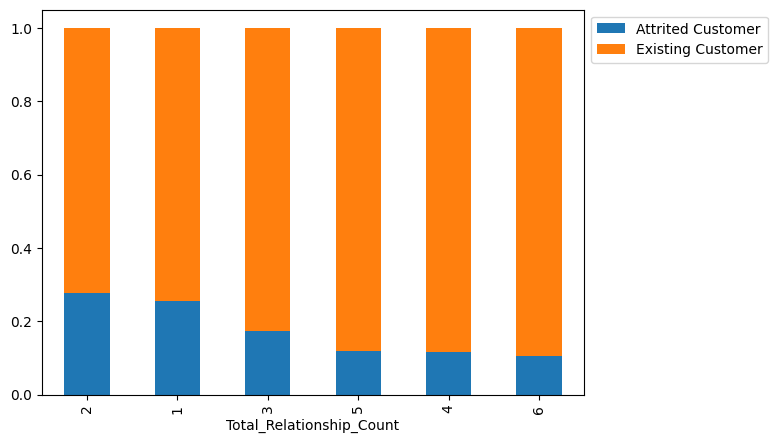

In [257]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag")

#### Observations:

This shows the number of products customers have with the bank. There seems to be a trend where customers with more products (higher relationship counts) are less likely to leave. This could indicate that increased engagement with the bank's offerings correlates with higher customer retention.

### **Attrition Flag vs Number of Months Inactive in the Last 12 Months by Thera Bank Customers**

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


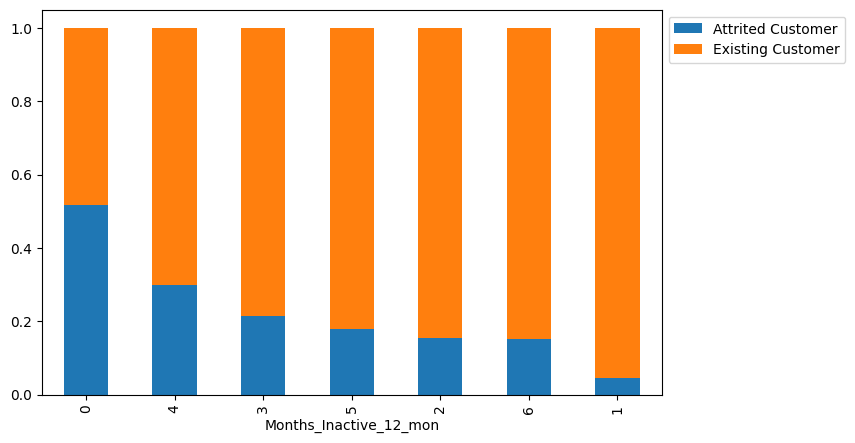

In [258]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag")

#### Observations:

Customers who have been inactive for 3-4 months show a higher rate of attrition. This suggests that customer inactivity is a strong indicator of potential churn, highlighting the importance of re-engaging customers who show signs of reduced activity.

### **Attrition Flag vs Number of Contacts in the Last 12 Months by Thera Bank Customer**

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


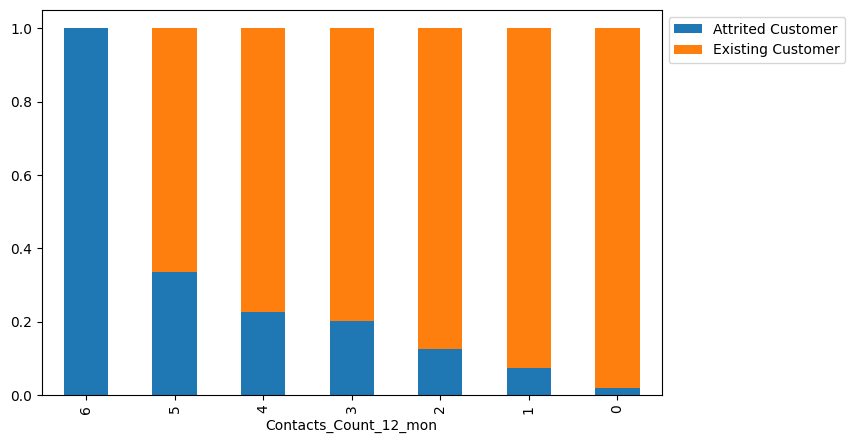

In [259]:
stacked_barplot(data,"Contacts_Count_12_mon", "Attrition_Flag")

#### Observations:

Customers who have had more contacts with the bank over the last 12 months tend to show higher attrition rates, especially as the contact count increases to 4 or more. This could indicate that higher contact counts might be related to issues or dissatisfaction leading to churn. Conversely, it might also suggest that the bank's efforts to engage customers who are already considering leaving may not always be successful in retaining them.

### **Correlation Check**

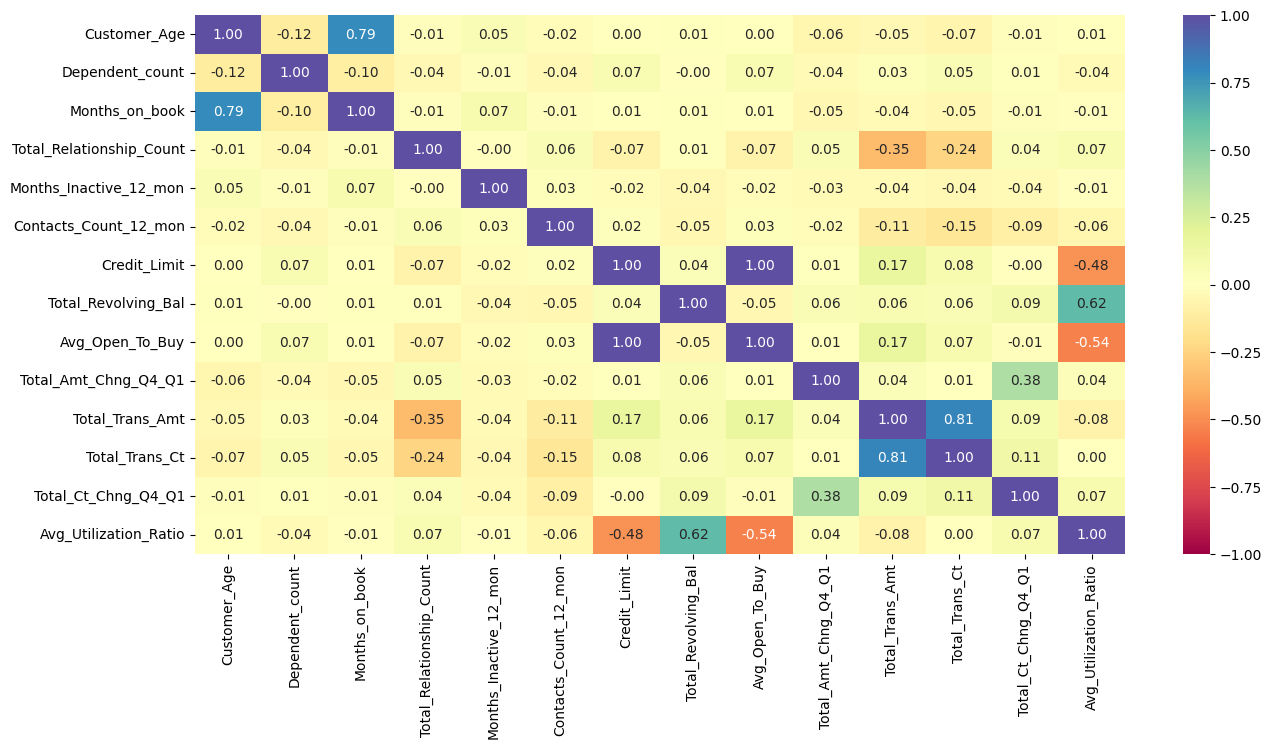

In [260]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:

**"Avg_Open_To_Buy" and "Credit_Limit" have a very high correlation of approximately 1.00.** This suggests that these two features are almost linearly dependent, likely because the average open to buy is calculated directly from the credit limit minus the current balance.

**"Total_Trans_Ct" (Total Transaction Count) and "Total_Trans_Amt" (Total Transaction Amount) are highly correlated with a value of about 0.81**. This indicates that as the number of transactions increases, the total amount of transactions also tends to increase.

**"Months_on_book" (Duration the account has been active) and "Customer_Age" have a correlation of approximately 0.79**, suggesting a relationship between the customer's age and the length of time their account has been active.

**"Avg_Utilization_Ratio" and "Total_Revolving_Bal" have a correlation of about 0.62**. The utilization ratio is a function of the total revolving balance and the credit limit, explaining their strong correlation.

**"Avg_Utilization_Ratio" and "Avg_Open_To_Buy" have a correlation of approximately 0.54**, while **"Avg_Utilization_Ratio" and "Credit_Limit" show a correlation of about 0.48**. These relationships underline how closely related these measures are to how much credit a customer is using versus how much they have available.

## Data Pre-processing & Missing Value Imputation

In [261]:
# Encode existing and attrited customers to 0 and 1 for machine learning analysis

data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [262]:
# Impute missing values for 'Education_Level' and 'Marital_Status' with their modes

for column in ['Education_Level', 'Marital_Status']:
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)

#### Observations:

Given the context, imputing missing values using the mode for the "Education_Level" and "Marital_Status" columns appears to be the best approach as it preserves as much data as possible without introducing significant bias.

In [270]:
# One-hot encode the categorical variables

categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

data_encoded = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

In [273]:
# Verify the changes

data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  int64  
 2   Dependent_count                 10127 non-null  int64  
 3   Months_on_book                  10127 non-null  int64  
 4   Total_Relationship_Count        10127 non-null  int64  
 5   Months_Inactive_12_mon          10127 non-null  int64  
 6   Contacts_Count_12_mon           10127 non-null  int64  
 7   Credit_Limit                    10127 non-null  float64
 8   Total_Revolving_Bal             10127 non-null  int64  
 9   Avg_Open_To_Buy                 10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 11  Total_Trans_Amt                 10127 non-null  int64  
 12  Total_Trans_Ct                  

## Train-Test Split

In [279]:
# Creating the copy of the dataframe

Data = data_encoded.copy()

In [297]:
# Separate features and target variable

X = Data.drop('Attrition_Flag', axis=1) #Features
y = Data["Attrition_Flag"] #Target variable

In [298]:
# Split the data into training and test sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [299]:
# Display the shapes of the train and test sets to verify

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 30), (2026, 30), (8101,), (2026,))

## Model Building

### Model Evaluation Criterion:

* **Recall:** also known as sensitivity, measures the proportion of actual positives (in this case, customers who will churn) that are correctly identified by the model. A high recall score indicates that the model is effective at catching most of the positive cases. For Thera bank, this means identifying customers at risk of churning.

<br>

* **Cost of False Negatives:** in the context of churn prediction, a false negative might lead to the bank unexpectedly losing a customer, along with all the potential revenue that customer would have generated. In contrast, a false positive (where the model incorrectly flags a loyal customer as at risk of churning) primarily leads to potentially unnecessary retention efforts targeted at that customer. While there are costs associated with false positives, such as potentially wasted marketing efforts, the cost of a false negative—losing a customer—is likely higher.

<br>

* **Strategic Implications:** Prioritizing recall allows the bank to cast a wider net to identify customers at risk of churning. This enables the bank to proactively engage these customers with retention strategies, personalized offers, or addressing their concerns, which could lead to reduced churn rates. However, it is also important to strike a balance with precision, as focusing solely on recall might increase the number of false positives, leading to inefficiencies in retention strategies.

<br>

* Focusing on recall and aiming to reduce false negatives is a strategic approach in churn prediction, aligning with the objective of minimizing customer loss. It’s important to complement this focus with other metrics to ensure a balanced and effective model evaluation strategy.

<br>

* **Ultimately, higher recall scores will be the focus of the subsequent models.**

In [303]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # To compute Accuracy
    recall = recall_score(target, pred)  # To compute Recall
    precision = precision_score(target, pred)  # To compute Precision
    f1 = f1_score(target, pred)  # To compute F1-score

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [304]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with Original Data

Sample code for model building with original data

In [306]:
# Libraries are imported and relevant models are listed

models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("Adaboost", AdaBoostClassifier(random_state=1)),
    ("Xgboost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric="logloss")),
    ("Decision Tree", DecisionTreeClassifier(random_state=1))
]

print("\nTraining and Validation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)  # Fit model
    train_recall = recall_score(y_train, model.predict(X_train))  # Training recall
    test_recall = recall_score(y_test, model.predict(X_test))  # Test (validation) recall
    print(f"{name} - Training Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}")


Training and Validation Performance:

Bagging - Training Recall: 0.9780, Test Recall: 0.8350
Random forest - Training Recall: 1.0000, Test Recall: 0.7605
GBM - Training Recall: 0.8915, Test Recall: 0.8447
Adaboost - Training Recall: 0.8634, Test Recall: 0.8220
Xgboost - Training Recall: 1.0000, Test Recall: 0.8835
Decision Tree - Training Recall: 1.0000, Test Recall: 0.7702


#### Observations:

**Bagging:** High recall scores, indicating good generalization with slightly better performance on unseen data compared to other models, except for XGBoost and GBM.

<br>

**Random Forest:** Perfect recall on the training set but a significant drop on the test set, suggesting overfitting.

<br>

**GBM (Gradient Boosting Machine):** Strong and balanced performance, indicating effective learning and generalization with less overfitting compared to the Random Forest.

<br>

**Adaboost:** Solid performance, though slightly outperformed by GBM and XGBoost, but shows good balance between training and test recall.

<br>

**XGBoost:** Outstanding performance on the test set, the highest among all models (tied with Random Forest and Decision Tree), despite showing signs of overfitting (perfect training recall).

<br>

**Decision Tree:** Like the Random Forest, it shows signs of overfitting with perfect training recall but lower test recall.

### Model Building with Original Data Takeaways

**XGBoost** shows the best performance on the test set in terms of recall, making it a strong candidate for further optimization. **GBM** also presents a compelling case with high recall and less overfitting compared to XGBoost.

<br>

Models showing perfect training recall (Random Forest, XGBoost, Decision Tree) **indicate overfitting**, where the model learns the training data too well, including noise, and may not perform as well on unseen data.

<br>

GBM offers a good balance between learning from the training data and generalizing to new data. Its performance, coupled with lower signs of overfitting, makes it an attractive option for further tuning.

### Model Building with Oversampled Data

In [308]:
# Synthetic Minority Over Sampling Technique

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [310]:
# Using SMOTE to oversample, existing models are evaluated again

print("\nTraining and Test Performance with Oversampled Data:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)  # Fit model to oversampled data
    print(f"Model: {name}")
    
    # Evaluate and display performance on oversampled training set
    
    display(model_performance_classification_sklearn(model, X_train_over, y_train_over))
    
    # Evaluate and display performance on original test set
    
    display(model_performance_classification_sklearn(model, X_test, y_test))


Training and Test Performance with Oversampled Data:

Model: Bagging


,Accuracy,Recall,Precision,F1
0,0.998,0.998,0.999,0.998


,Accuracy,Recall,Precision,F1
0,0.950,0.890,0.804,0.845


Model: Random forest


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


,Accuracy,Recall,Precision,F1
0,0.956,0.861,0.850,0.855


Model: GBM


,Accuracy,Recall,Precision,F1
0,0.978,0.981,0.976,0.978


,Accuracy,Recall,Precision,F1
0,0.963,0.893,0.868,0.880


Model: Adaboost


,Accuracy,Recall,Precision,F1
0,0.966,0.969,0.962,0.966


,Accuracy,Recall,Precision,F1
0,0.950,0.874,0.813,0.842


Model: Xgboost


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


,Accuracy,Recall,Precision,F1
0,0.970,0.896,0.908,0.902


Model: Decision Tree


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


,Accuracy,Recall,Precision,F1
0,0.918,0.822,0.694,0.753


#### Observations:

**Bagging:** Significant improvement in recall on the test set compared to the original data, indicating better identification of the minority class (customers likely to churn).

High precision and F1 score suggest a balanced performance in terms of both recall and precision.

<br>

**Random Forest:** Shows signs of overfitting with perfect scores on the training data but decreased performance on the test data. Despite this, it performs well on the test set, indicating robustness.

The recall, precision, and F1 scores on the test set are high, showing good generalization but slightly less so compared to Bagging.

<br>

**GBM (Gradient Boosting Machine):** Excellent recall on the test set, indicating effective identification of churned customers.

High precision and F1 scores on the test set indicate a strong balance between recall and precision, making it one of the top performers.

<br>

**Adaboost:** Good recall on the test set, though slightly lower than GBM and Xgboost.

Balanced precision and F1 scores suggest effective handling of the oversampled data, albeit with slightly lower performance compared to GBM and Xgboost.

<br>

**XGBoost:** Outstanding performance across all metrics on the test set, showing the best balance between recall and precision.

Perfect scores on the oversampled training data indicate overfitting, but the high test scores demonstrate excellent generalization.

<br>

**Decision Tree:** Perfect scores on the oversampled training data but lower scores on the test data, indicating overfitting.

Compared to ensemble methods, it shows lower performance on the test set across all metrics, particularly precision, which is significantly lower.

### Oversampling Takeaways

Oversampling has improved model performance across the board, particularly in terms of recall. This indicates that oversampling effectively addresses class imbalance, helping models better identify the minority class.

<br>

**GBM** and **Xgboost** emerge as top performers, offering a strong balance between recall and precision on the test set. Their high F1 scores indicate they are effective at identifying churned customers without excessively misclassifying non-churned customers.

<br>

While overfitting is observed in models achieving perfect training scores (Random Forest, Xgboost, Decision Tree), their high test scores, particularly for Xgboost, suggest that they still generalize well.

### Model Building with Undersampled Data

In [311]:
# Creating copies of the original training data
X_train_original = X_train.copy()
y_train_original = y_train.copy()

In [312]:
# Random undersampler for under sampling the data

rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [313]:
# Retrain models on the undersampled data

undersampled_training_performance = []
undersampled_test_performance = []

for name, model in models:
    
    # Ensure you're using the correct variable names for the undersampled data
    
    model.fit(X_train_un, y_train_un)  # Fit model to undersampled data
    
    # Calculate and print the performance metrics for each model
    
    # You can replace recall_score with your model_performance_classification_sklearn for detailed metrics
    
    training_metrics = model_performance_classification_sklearn(model, X_train_un, y_train_un)
    test_metrics = model_performance_classification_sklearn(model, X_test, y_test)
    print(f"Model: {name} - Training Performance")
    display(training_metrics)
    print(f"Model: {name} - Test Performance")
    display(test_metrics)

Model: Bagging - Training Performance


,Accuracy,Recall,Precision,F1
0,0.997,0.995,0.998,0.997


Model: Bagging - Test Performance


,Accuracy,Recall,Precision,F1
0,0.933,0.935,0.714,0.810


Model: Random forest - Training Performance


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


Model: Random forest - Test Performance


,Accuracy,Recall,Precision,F1
0,0.937,0.939,0.729,0.820


Model: GBM - Training Performance


,Accuracy,Recall,Precision,F1
0,0.975,0.980,0.971,0.975


Model: GBM - Test Performance


,Accuracy,Recall,Precision,F1
0,0.946,0.961,0.752,0.844


Model: Adaboost - Training Performance


,Accuracy,Recall,Precision,F1
0,0.951,0.954,0.948,0.951


Model: Adaboost - Test Performance


,Accuracy,Recall,Precision,F1
0,0.936,0.955,0.718,0.819


Model: Xgboost - Training Performance


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


Model: Xgboost - Test Performance


,Accuracy,Recall,Precision,F1
0,0.953,0.958,0.781,0.860


Model: Decision Tree - Training Performance


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


Model: Decision Tree - Test Performance


,Accuracy,Recall,Precision,F1
0,0.905,0.909,0.631,0.745


#### Observations:

**Bagging:** Nearly perfect across all metrics in the training performance, suggesting slight overfitting.

Excellent recall in the test performance:, but with a decrease in precision, leading to a lower F1 score compared to training.

<br>

**Random Forest:** Perfect scores in training performance, indicating overfitting to the training data.

High recall but lower precision in the test performance, similar to Bagging, indicating effective identification of the minority class at the cost of more false positives.

<br>

**GBM (Gradient Boosting Machine):** High scores with slightly less overfitting in the training performance than Random Forest or Bagging.

Outstanding recall with comparatively higher precision than Bagging or Random Forest in the test performance, making it one of the stronger performers under undersampling.

<br>

**Adaboost:** Shows less overfitting compared to some other models in training performance, with strong performance metrics.

High recall similar to GBM, but with slightly lower precision in test performance, leading to a high but not top F1 score.

<br>

**XGBoost:** Perfect training scores, indicating potential overfitting in training performance.

Similar to GBM, shows very high recall and the highest precision among the models in test performance, leading to the best F1 score. Xgboost seems to handle the trade-off between precision and recall most effectively under undersampling.

<br>

**Decision Tree:** Perfect scores in training performance indicate overfitting.

Lower performance across all metrics compared to ensemble methods, with significant drops in precision and F1 score in test performance.

### Undersampling Takeaways

**GBM** and **Xgboost** stand out as the most effective models in this undersampled scenario, balancing recall and precision better than others and achieving the highest F1 scores.

<br>

**Overfitting is a concern**, especially with models achieving perfect training scores. Hyperparameter tuning could mitigate overfitting and potentially improve test performance.

## Hyperparameter Tuning

### Gradient Boosting Model Tuning

In [314]:
param_grid_gbm = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "subsample": [0.7, 0.9],
    "max_depth": [3, 4, 5]
}

gbm = GradientBoostingClassifier(random_state=1)
random_search_gbm = RandomizedSearchCV(gbm, param_distributions=param_grid_gbm, n_iter=20,
                                       scoring='recall', n_jobs=-1, cv=5, random_state=1)
random_search_gbm.fit(X_train, y_train)

# Print the best parameters and recall score for each model

print("GBM Best Parameters:", random_search_gbm.best_params_)
print("GBM Best Recall:", random_search_gbm.best_score_)

GBM Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
GBM Best Recall: 0.8756020278833967


#### Observations:

Gradient Boosting shows a good balance between recall and precision, indicating effectiveness in identifying churn without overly compromising on precision. 

<br>

After hyperparameter tuning, the best parameters found by the randomized search for the GBM model are:
**'subsample': 0.9
'n_estimators': 100
'max_depth': 5
'learning_rate': 0.1**

<br>

These parameters suggest that a subsample rate of 90%, 100 estimators (trees), a maximum depth of 5 for each tree, and a learning rate of 0.1 are the optimal settings within the range of values specified in the parameter grid, according to the randomized search's sampling of the hyperparameter space.

<br>

The best recall score achieved with these parameters on the training data, using cross-validation with 5 folds, is approximately 0.876. This score is a good indication of the model’s ability to correctly identify the positive class (assuming a binary classification problem where recall is a priority) in the cross-validation process.

### XGBoost Model Tuning

In [331]:
param_grid_xgb = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.5, 0.7, 1],
    "max_depth": [3, 4, 5]
}

xgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric="logloss")
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_grid_xgb, n_iter=20,
                                       scoring='recall', n_jobs=-1, cv=5, random_state=1)
random_search_xgb.fit(X_train, y_train)

print("XGBoost Best Parameters:", random_search_xgb.best_params_)
print("XGBoost Best Recall:", random_search_xgb.best_score_)

XGBoost Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}
XGBoost Best Recall: 0.8763653646733495


#### Observations:

XGBoost exhibits high performance across metrics, particularly in scenarios involving class imbalance. It has numerous parameters that were tuned to enhance performance further. 

<br>

After hyperparameter tuning, the best parameters found by the randomized search for the XGBoost model are: 


**'subsample': 0.9** suggests that using 90% of the data for each tree can help prevent overfitting while still providing enough data to learn the patterns.

**'n_estimators': 100** indicates that 100 trees in the ensemble strike a good balance between model complexity and training time for optimal performance.

**'max_depth': 5** provides a reasonable depth for each tree, allowing the model to capture interactions between features without becoming too complex.

**'learning_rate': 0.1** is a moderate pace for updating model weights, helping to ensure convergence to a good model without overshooting.

**'colsample_bytree': 1** means using all features when building each tree, which, in this case, was found to be optimal.

<br>

The best recall score achieved with these parameters on the training data is approximately 0.876 indicating a high ability of the model to identify all relevant instances of the positive class across the cross-validation folds. 

This is a strong performance, especially for imbalanced classes where missing positive instances (false negatives) is particularly concerning.

### Random Forest Model Tuning

In [332]:
param_grid_rf = {
    "n_estimators": np.arange(50, 110, 25),
    "max_features": [0.5, 0.7, 1],
    "max_depth": [3, 4, 5]
}

rf = RandomForestClassifier(random_state=1)
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_grid_rf, n_iter=20,
                                      scoring='recall', n_jobs=-1, cv=5, random_state=1)
random_search_rf.fit(X_train, y_train)

print("Random Forest Best Parameters:", random_search_rf.best_params_)
print("Random Forest Best Recall:", random_search_rf.best_score_)

Random Forest Best Parameters: {'n_estimators': 75, 'max_features': 0.7, 'max_depth': 5}
Random Forest Best Recall: 0.739748242885125


#### Observations:

Although Random Forest showed signs of overfitting (perfect training scores), its strong recall and overall robustness across different sampling strategies made it a good candidate for tuning to see if performance could be optimized. 

<br>

After hyperparameter tuning, the best parameters found by the randomized search for the Random Forest model are:

**'n_estimators': 75** suggests that the model performs best with 75 trees, providing a balance between model complexity and the ability to learn from the training data.

**'max_features': 0.7** indicates using 70% of the features for each split contributes to the best model performance by allowing the trees to explore a variety of features while reducing the risk of overfitting.

**'max_depth': 5** shows that a moderate depth for the trees prevents the model from becoming too complex and overfitting to the training data, which is crucial for maintaining good generalization to unseen data.

<br>

The best recall score achieved with these parameters on the training data is approximately 0.740 which is lower than what was achieved with the GBM and XGBoost models. 

Recall measures the model's ability to identify all relevant instances of the positive class, and in this case, while the Random Forest model has a respectable recall, it doesn't perform as well as the other two models in this specific metric.

### Test set final performance

In [318]:
# Retrieve the best estimator for each tuned model

best_gbm = random_search_gbm.best_estimator_
best_xgb = random_search_xgb.best_estimator_
best_rf = random_search_rf.best_estimator_

In [319]:
def evaluate_model(model, X_test, y_test):
    
    # Predictions
    
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print metrics
    
    print(f"Accuracy: {acc:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1: {f1:.4f}")

# Evaluate each model

print("GBM Performance on Test Set:")
evaluate_model(best_gbm, X_test, y_test)

print("\nXGBoost Performance on Test Set:")
evaluate_model(best_xgb, X_test, y_test)

print("\nRandom Forest Performance on Test Set:")
evaluate_model(best_rf, X_test, y_test)

GBM Performance on Test Set:
Accuracy: 0.9748, Recall: 0.8803, Precision: 0.9510, F1: 0.9143

XGBoost Performance on Test Set:
Accuracy: 0.9733, Recall: 0.8738, Precision: 0.9474, F1: 0.9091

Random Forest Performance on Test Set:
Accuracy: 0.9383, Recall: 0.7087, Precision: 0.8622, F1: 0.7780


#### Observations:

**All three models exhibit high accuracy,** with GBM and XGBoost performing exceptionally well. This indicates a high overall correctness in predictions across both classes.


**GBM and XGBoost show very high recall scores,** meaning they are particularly effective at identifying true positives (e.g., correctly identifying customers who will churn). Random Forest has a lower recall, indicating it misses more true positives than the other models.


**GBM and XGBoost also score high on precision,** which means a high proportion of the instances they predict as positive are indeed positive. Random Forest, while having a lower precision compared to GBM and XGBoost, still performs reasonably well.


The F1 scores, which balance precision and recall, are highest for GBM, followed closely by XGBoost, and then Random Forest. **This suggests that GBM and XGBoost maintain a better balance between identifying as many positive instances as possible while minimizing false positives.**

## Model Comparison and Final Model Selection

**The GBM model stands out as the best performer across all metrics on the test set,** making it an excellent choice for the Thera Bank classification model if both accuracy and the ability to identify positive instances correctly are sought after features. Its high recall score makes it the best model available for this use case. 


XGBoost also shows impressive performance, nearly matching GBM, and would be a strong candidate as well, especially if additional parameter tuning or feature engineering could further optimize its results.


Random Forest, while not performing as well as GBM or XGBoost, still demonstrates respectable accuracy and precision but falls short in recall and F1 score. It might be considered for applications where the consequences of false positives are more critical than missing out on some positives.

# Business Insights and Conclusions

### Understanding Customer Behavior


**Key Predictors of Churn:** By analyzing feature importance from the models, especially GBM and XGBoost, Thera Bank can identify which customer behaviors and attributes are most predictive of churn. For example, factors such as high credit utilization, lower transaction frequency, or dissatisfaction expressed through customer service interactions might be significant predictors.


**Segment-Specific Trends:** The models may reveal that certain customer segments are more prone to churn. These could be based on demographic factors (e.g., age, education level), product usage patterns, or other characteristics. Understanding these segments can help tailor retention strategies more effectively.


### Enhancing Customer Engagement


**Targeted Retention Strategies:** With insights into who is likely to churn and why, the models can inform more targeted, personalized retention efforts. For instance, customers identified as high risk for attrition might be offered loyalty incentives, personalized product recommendations, or proactive outreach to address service issues.


**Improving Customer Experience:** Identifying the root causes or commonalities among churned customers can guide improvements in product offerings, customer service, and overall customer experience. Enhancing satisfaction in these areas can be a powerful way to increase loyalty and reduce churn rates.


### Optimizing Resource Allocation


**Efficient Use of Marketing and Retention Efforts:** By focusing retention strategies on those most at risk of churning, as identified by the predictive models, the bank can allocate its resources more efficiently and likely see a higher return on investment for its retention initiatives.


**Data-Driven Decision Making:** The analytical approach to understanding churn provides a solid foundation for decision-making regarding product development, marketing, customer service improvements, and other strategic areas.


### Strategic Implications


**Long-Term Customer Value Maximization:** By reducing churn, the bank not only retains more customers but also improves the long-term value derived from each customer relationship. This can have significant positive impacts on revenue and profitability.


**Feedback Loop for Continuous Improvement:** The predictive modeling approach allows for ongoing monitoring and adjustment of strategies based on new data and emerging trends, fostering a culture of continuous improvement and adaptability.


### Concluding Thoughts

The work on predicting credit card customer attrition at Thera Bank illustrates the power of data-driven insights to inform strategic business decisions. The models developed not only serve as tools for identifying at-risk customers but also provide a deeper understanding of the factors influencing customer loyalty. By acting on these insights, Thera Bank can enhance customer satisfaction, optimize retention efforts, and ultimately, secure a competitive advantage in the market.

***